 # 0. Installation

In [ ]:
!pip install scikit-learn==0.23

     |████████████████████████████████| 7.3MB 17.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install pycaret==2.1.2

     |████████████████████████████████| 256kB 14.2MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 1.8MB 51.0MB/s 
     |████████████████████████████████| 65.8MB 47kB/s 
     |████████████████████████████████| 276kB 56.5MB/s 
     |████████████████████████████████| 14.2MB 256kB/s 
     |████████████████████████████████| 174kB 59.2MB/s 
     |████████████████████████████████| 245kB 61.5MB/s 
     |████████████████████████████████| 1.6MB 52.9MB/s 
     |████████████████████████████████| 2.1MB 42.2MB/s 
     |████████████████████████████████| 1.1MB 42.5MB/s 
     |████████████████████████████████| 348kB 46.6MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 163kB 56.5MB/s 
     |████████████████████████████████| 153kB 61.4MB/s 
     |████████████████████████████████| 3.1MB 45.5MB/s 
     |████████████████████████████████| 81kB 12.2MB

In [3]:
#Import EDA (exploratory data analysis) and plotting library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# 0-1. Mount Data Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1_path="/content/drive/My Drive/semi3/genres_v2.csv"
df2_path="/content/drive/My Drive/semi3/playlists.csv"
df = pd.read_csv(df1_path, encoding='utf-8')
df2 = pd.read_csv(df2_path, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1-0. EDA - Look into Data

In [ ]:
# Y data: category 몇개인지 보기 
len(df['genre'].unique())

15

In [ ]:
# Y data: 장르 데이터 각 항목마다 몇개인지 보기
df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

### Feature description
- ‘Key’ : 음의 높낮이를 의미하며, 각각에 해당하는 음의 높낮이를 정수에 mapping했다. E.g. 0 = C, 1 = C♯/D♭, 2 = D등
- ‘Mode’ : 장조(도레미파솔라시)로 이루어져있다면 1, 단조(라시도레미파솔)로 이루어져 있다면 0을 갖는다.
- ‘Acousticness’ : Acoustic적인 트랙인지를 말해주는 지표로서, 0~1값을 갖고, 해당 트랙이 Acoustic적인 음악일수록 1값을 갖는다.
- ‘Danceability’ : 음악적 요소인 템포, 리듬의 안정성등의 조합을 기반으로하여 춤에 적합한지를 나타내는 지표이다. 0~1사이의 값을 갖으며, 춤에 적합한 트랙일수록 1의 값을 갖는다.
- ‘Energy’ : 활동적이고 긴장을 줄 수 있는 트랙인지에 대한 지표로서 0~1사이의 값을 갖는다.
- ‘Instrumentalness’ : 트랙이 목소리가 주인지를 파악하는 지표로서, 여기서 말하는 목소리란, 추임새적인 부분들을 악기적인 요소로 보고 이런 악기적인 요소가 많을수록 1에 가깝운 값을 갖는다.
- ‘Liveness’ : 해당 트랙이 live음원인지를 파악하는 요소로서, 0.8을 넘는다면 live 트랙일 확률이 높다.
- ‘Loudness’ : 트랙 전반적인 평균 데시벨(dB)로서, 상대적으로 다른 트랙들과 비교할 수 있다. 일반적인 값은 -60에서 0 db 사이이다.
- ‘Speechiness’ : 토크쇼, 오디오북, 시같이 구어체 단어들의 존재를 탐지하는 지표로서 0.66 값 이상은 아마도 완전히 구어체로 만들어진 트랙을 의미한다고 하며, 1에 가까울수록 구어체를 많이 가지고 있다.
- ‘Valence’ : 트랙의 감성을 나타내는 지표로서, 0~1사이의 값을 갖는다. 1에 가까울수록 밝고 긍정적인 느낌의 트랙을 의미한다.
- ‘Tempo’ : 전반적인 트랙의 BPM을 추정하는 지표이다.

In [6]:
# 장르별 features 특성 보기
display(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms',
       'time_signature','genre']].groupby(['genre']).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))

In [7]:
# Drop Unnecessary columns
df= df.drop(["title","Unnamed: 0","song_name","analysis_url","track_href","uri","id","type"],axis=1)

In [ ]:
#Pivot table by genre, mean of each feature
pd.pivot_table(df, index='genre', aggfunc=np.mean)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,
Dark Trap,0.159493,0.618834,187707.330275,0.646851,0.277276,5.298384,0.185081,-7.998401,0.536479,0.123434,149.791186,3.961337,0.273663
Emo,0.143094,0.493699,218317.432143,0.761175,0.011402,5.052976,0.195243,-5.433641,0.685714,0.080325,153.888640,3.938690,0.444145
Hiphop,0.195569,0.698982,227954.272787,0.654418,0.017154,5.553170,0.210581,-7.014983,0.527741,0.217150,162.980479,3.975561,0.523628
Pop,0.149251,0.676807,211392.828633,0.697638,0.013831,5.399132,0.177949,-5.632072,0.548807,0.088363,152.098937,3.984816,0.550264
Rap,0.170566,0.742877,203007.674784,0.620083,0.006939,5.048701,0.181320,-6.887086,0.522186,0.217862,126.006374,3.985931,0.440921
RnB,0.225276,0.674206,226402.473559,0.598884,0.007400,5.021915,0.178984,-6.899896,0.532158,0.143110,157.533793,3.960934,0.493974
Trap Metal,0.114926,0.647564,147195.234151,0.749157,0.057051,4.663088,0.243655,-5.879087,0.717791,0.209677,148.684947,3.953476,0.348786
Underground Rap,0.162708,0.744658,176152.595234,0.635776,0.025280,5.059064,0.191116,-7.362036,0.613617,0.224992,152.914521,3.979915,0.444629
dnb,0.019543,0.520944,286548.825017,0.873433,0.459998,5.619016,0.202883,-4.063237,0.446055,0.083478,173.849166,3.998314,0.253062


In [8]:
# Information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.5+ MB


In [9]:
#Null value 확인 - none 
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

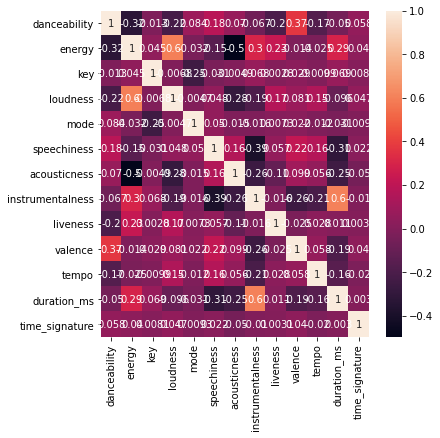

In [10]:
# Correlation map 확인 
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)#,cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


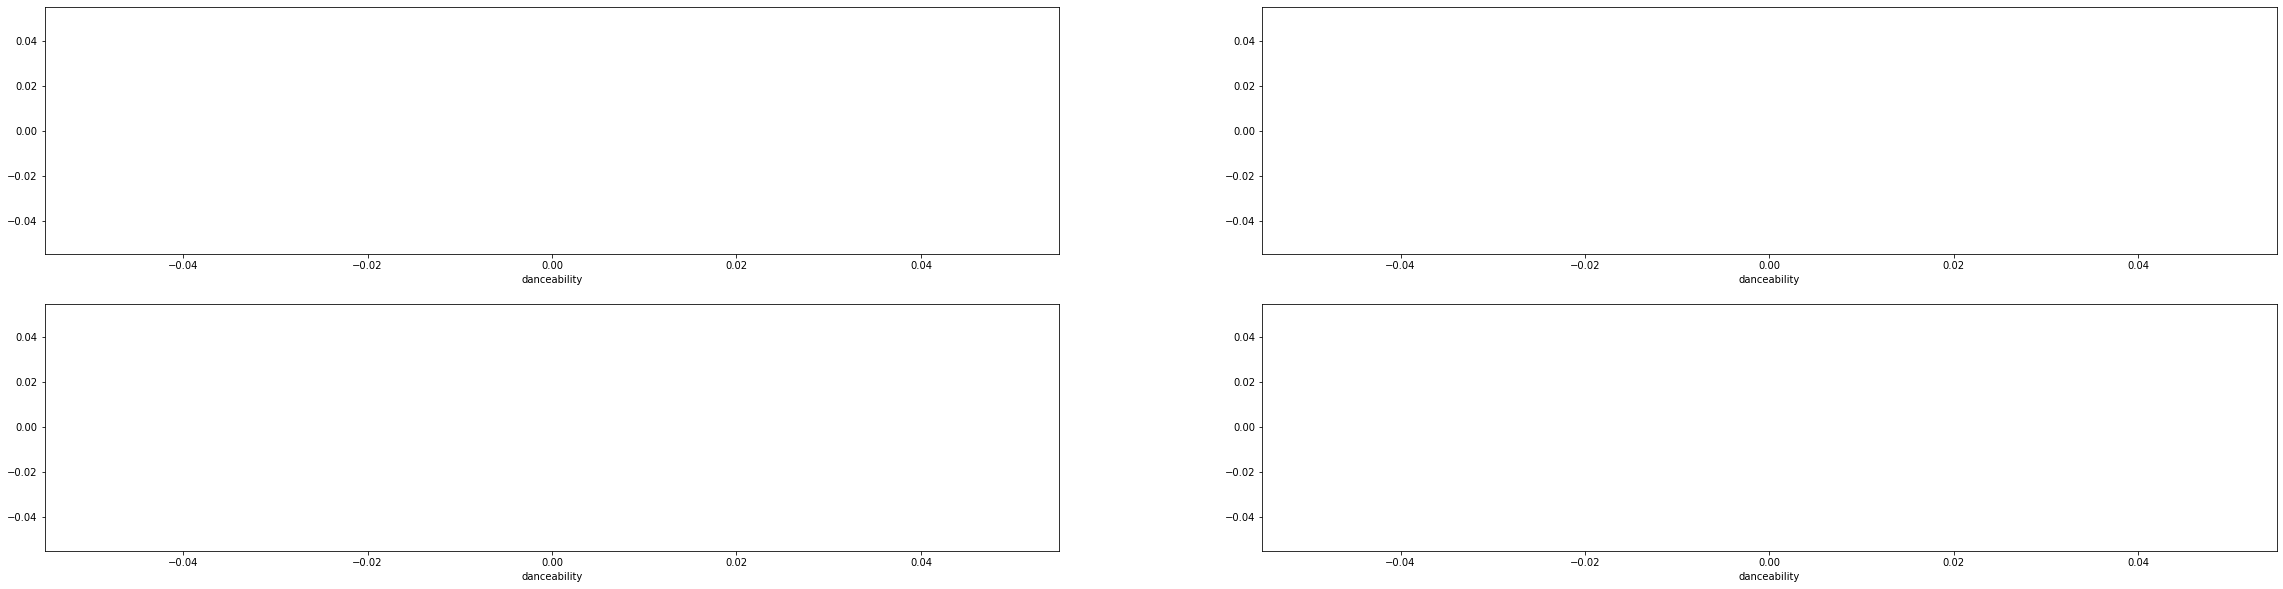

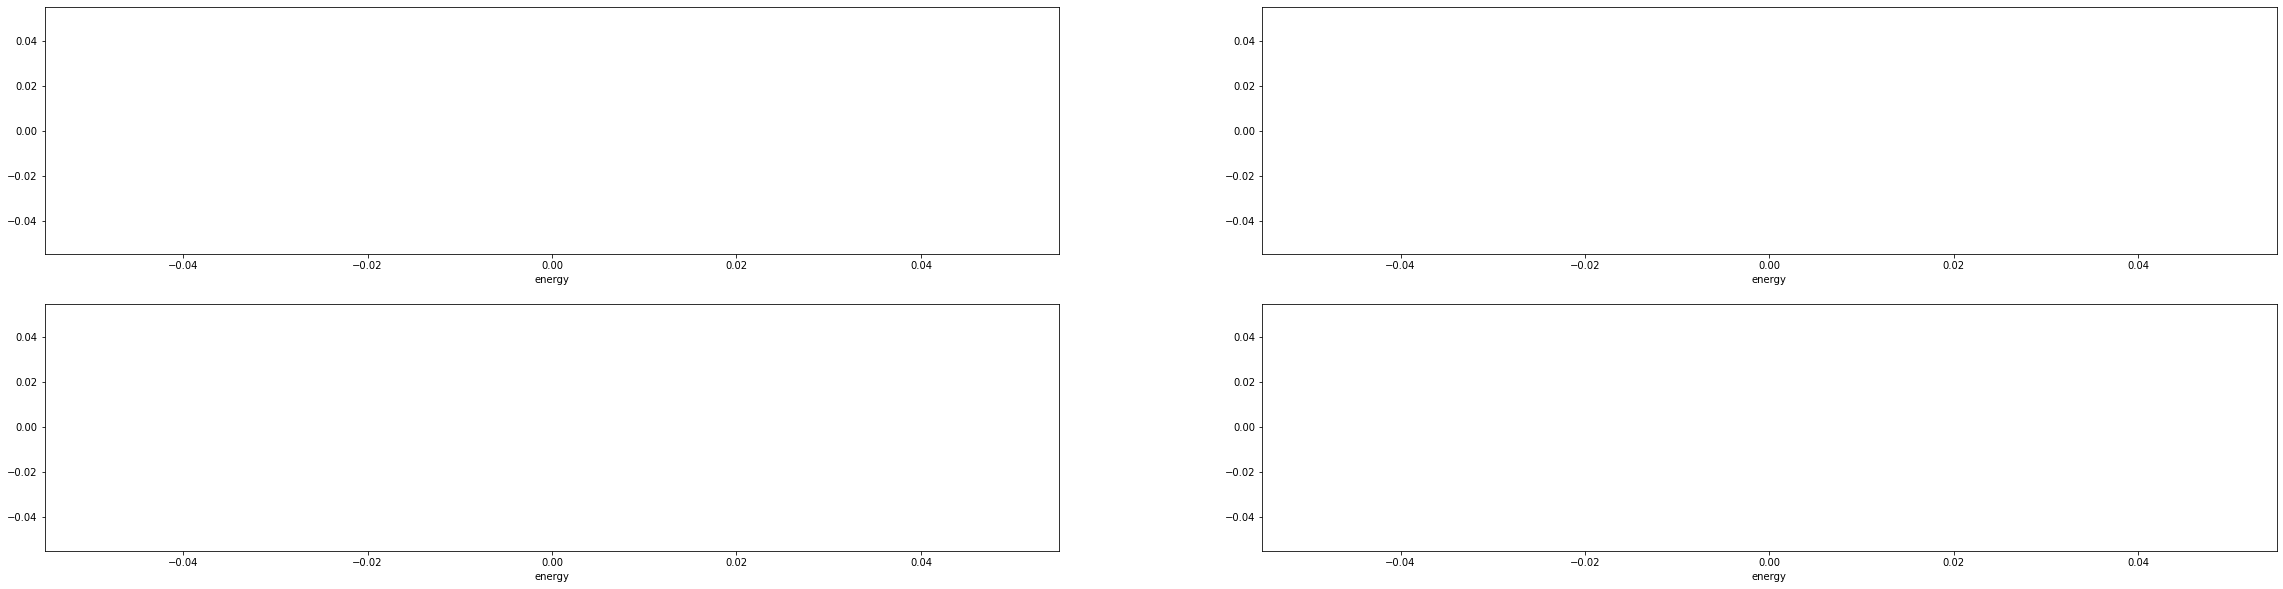

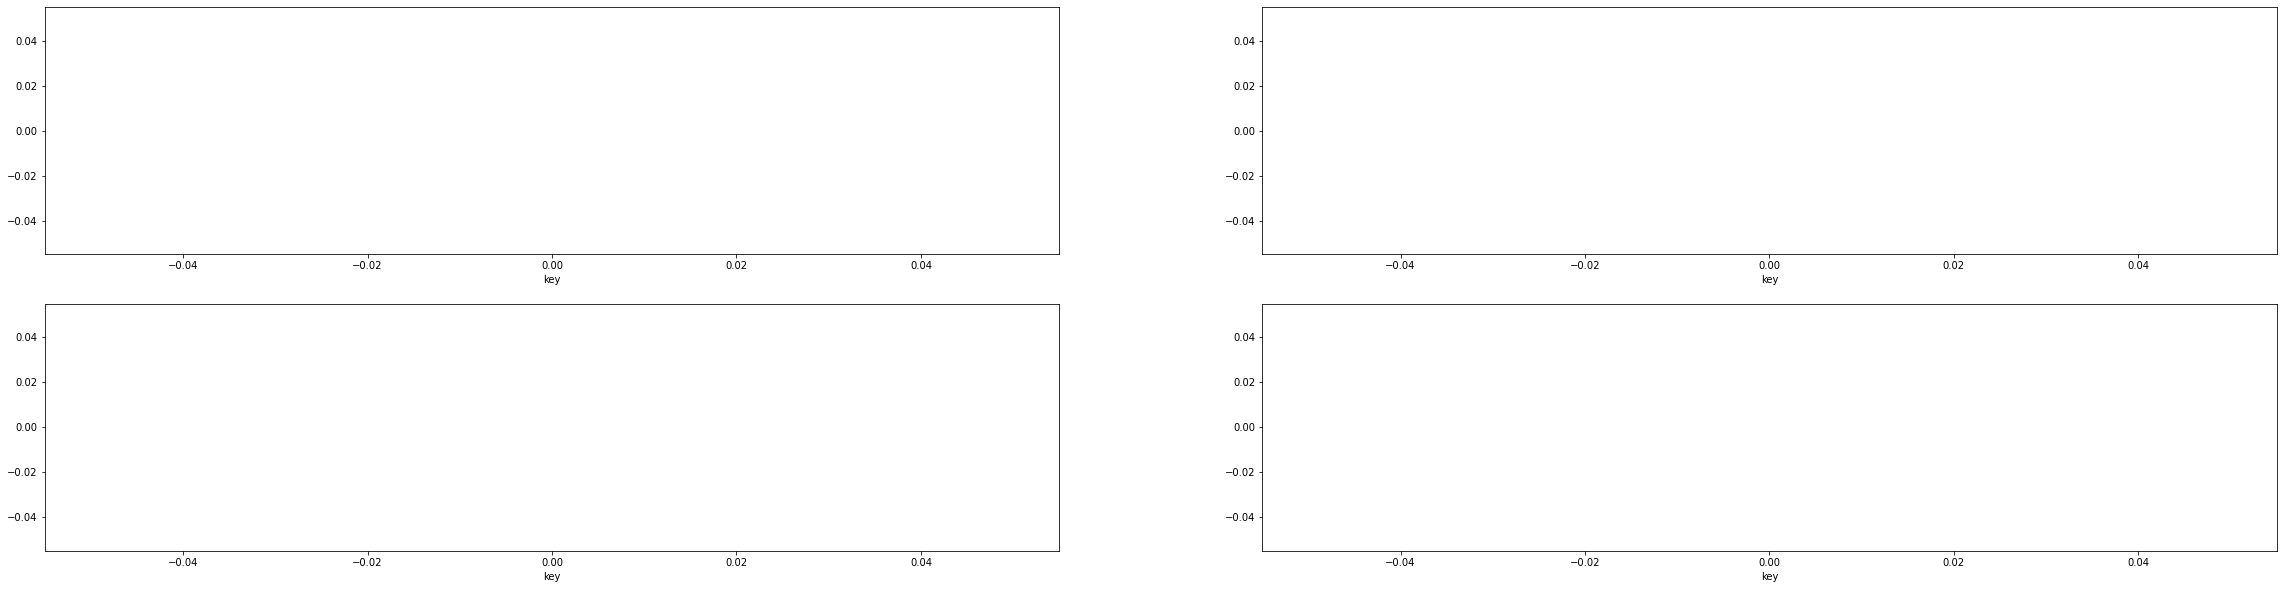

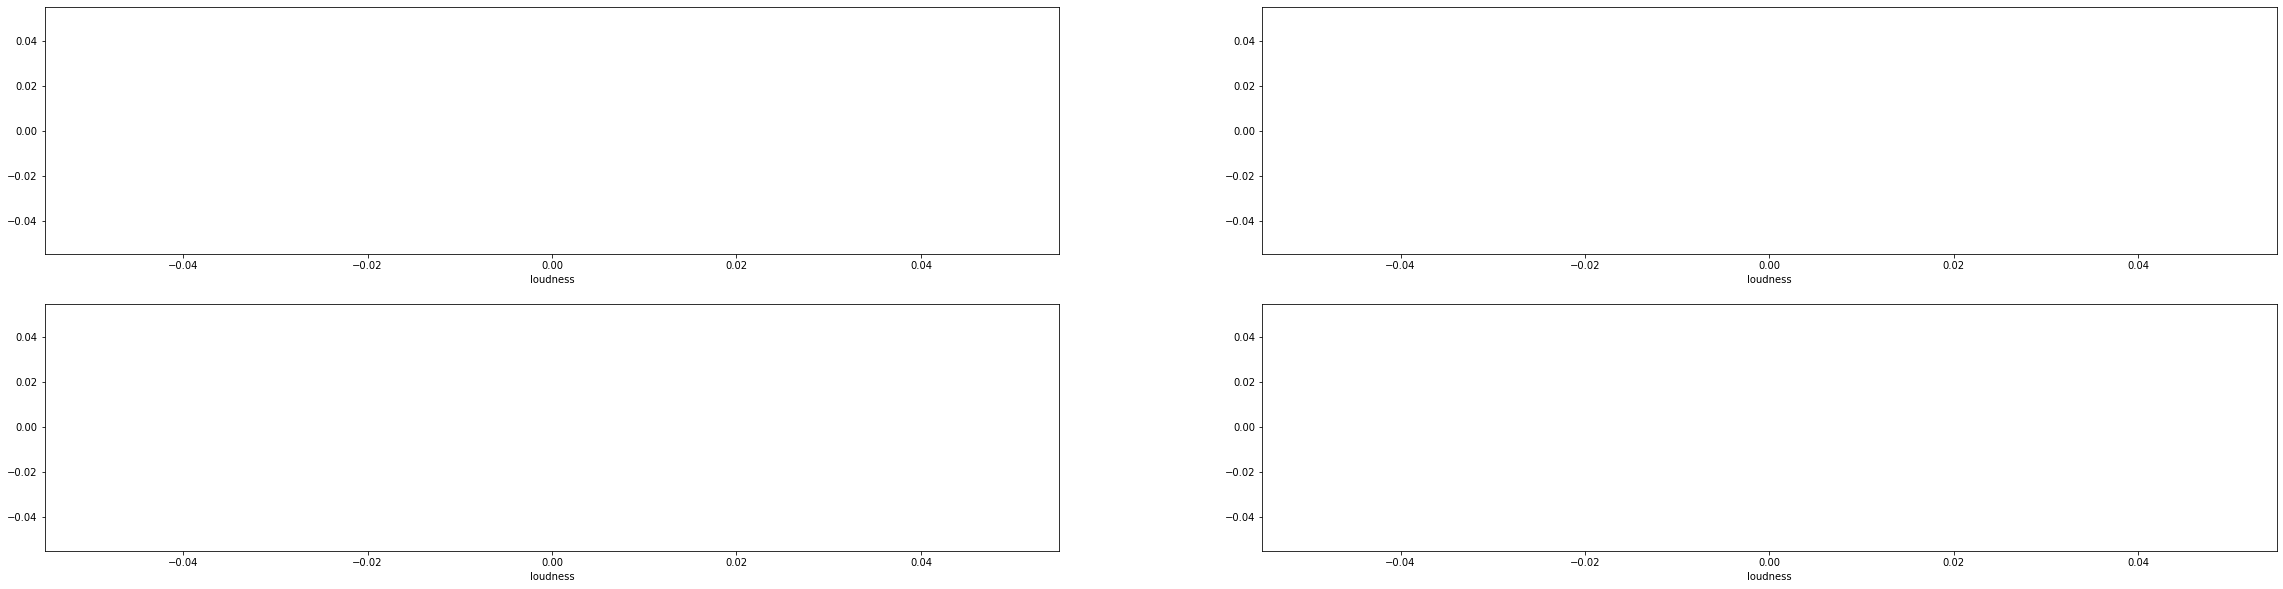

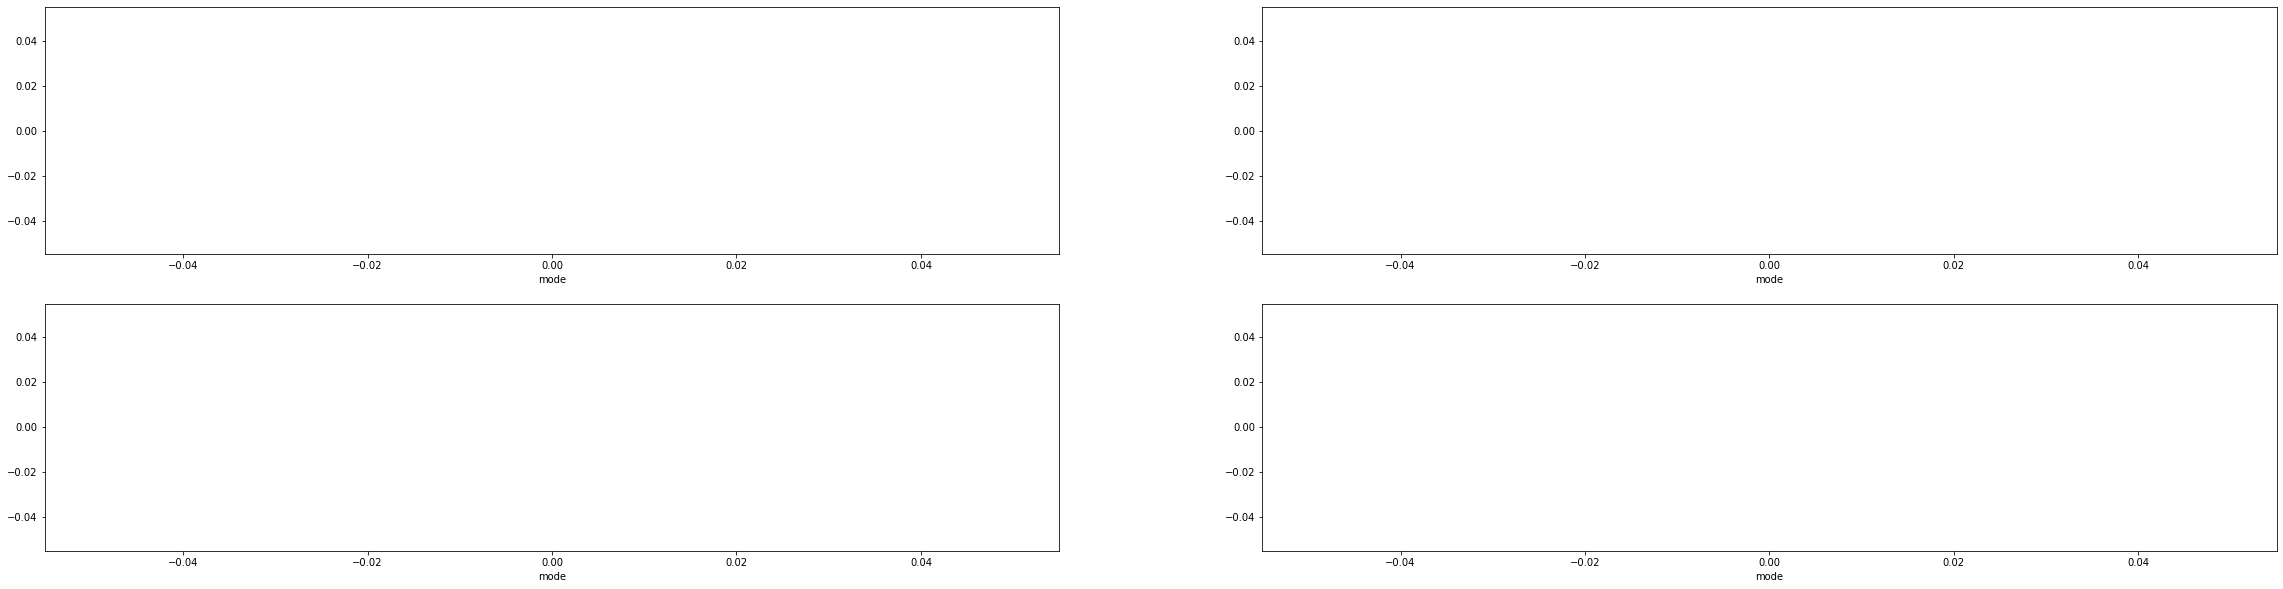

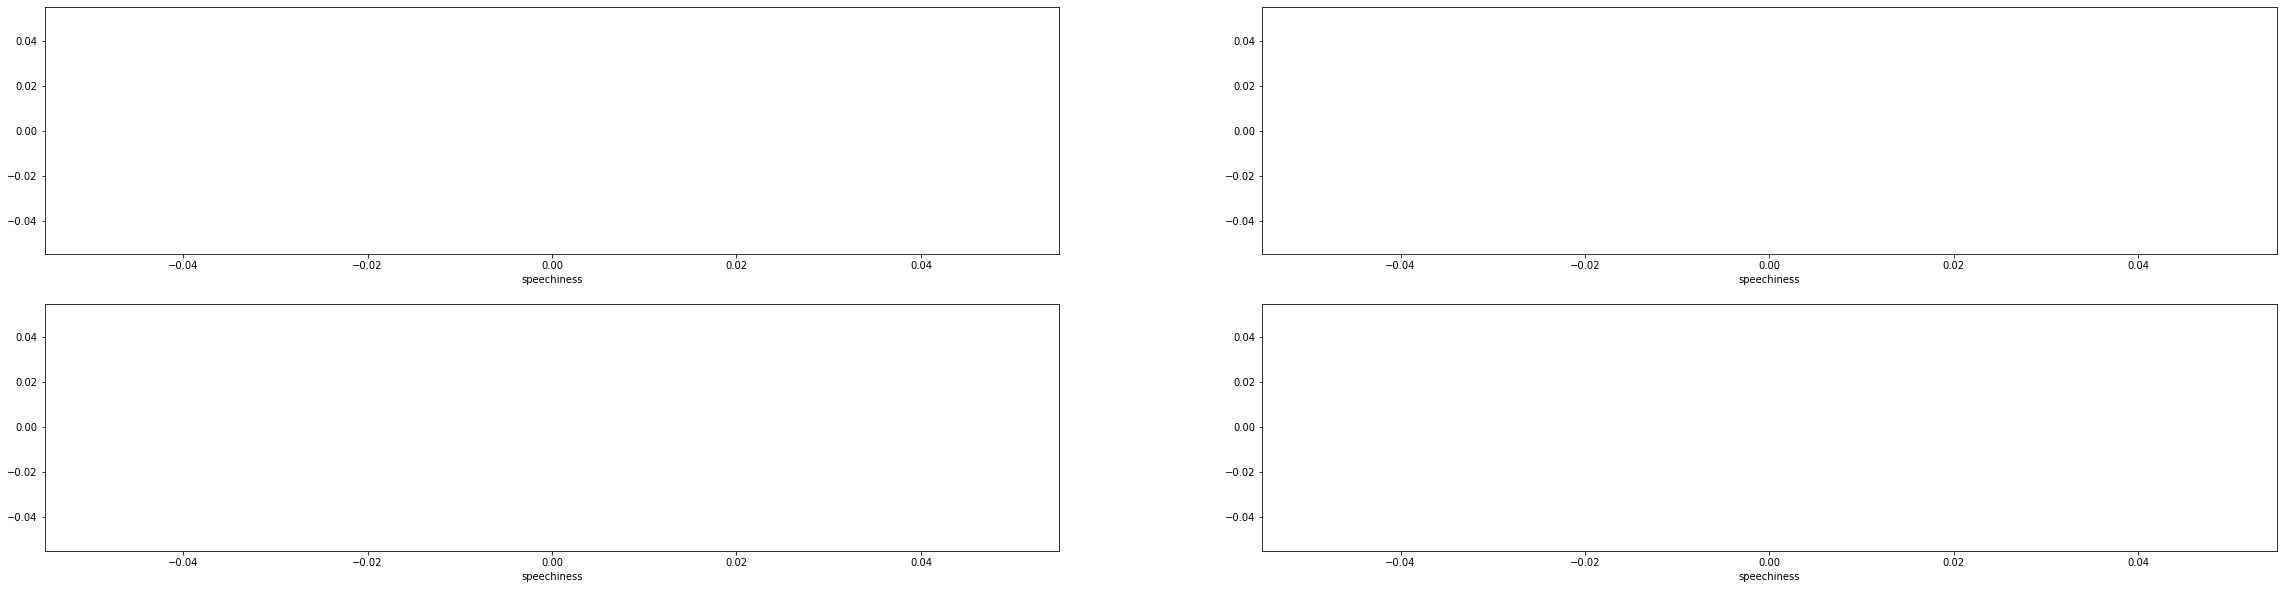

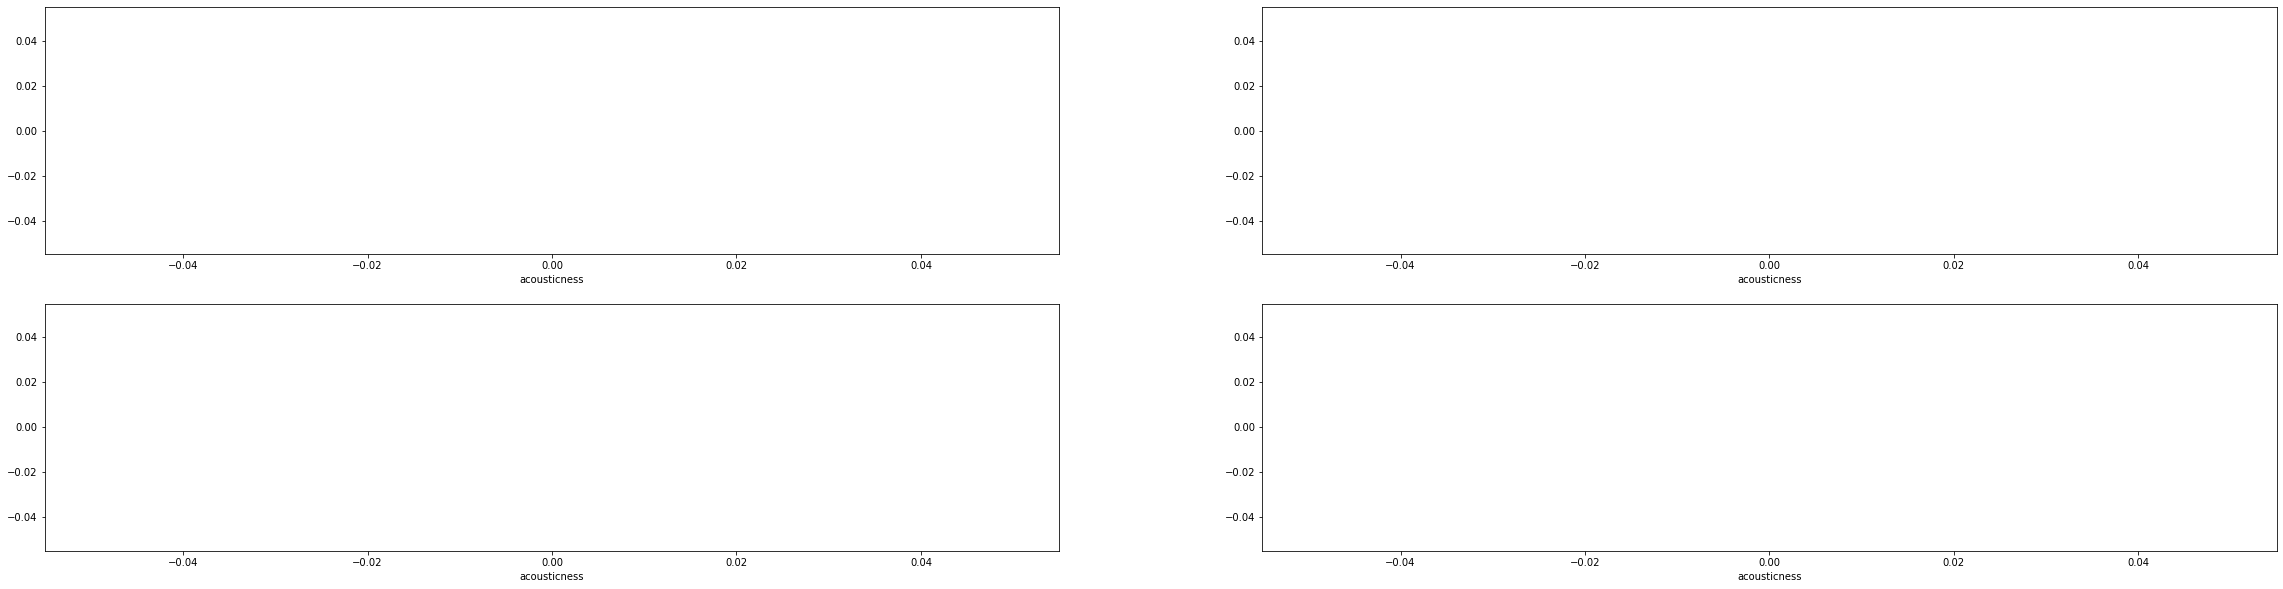

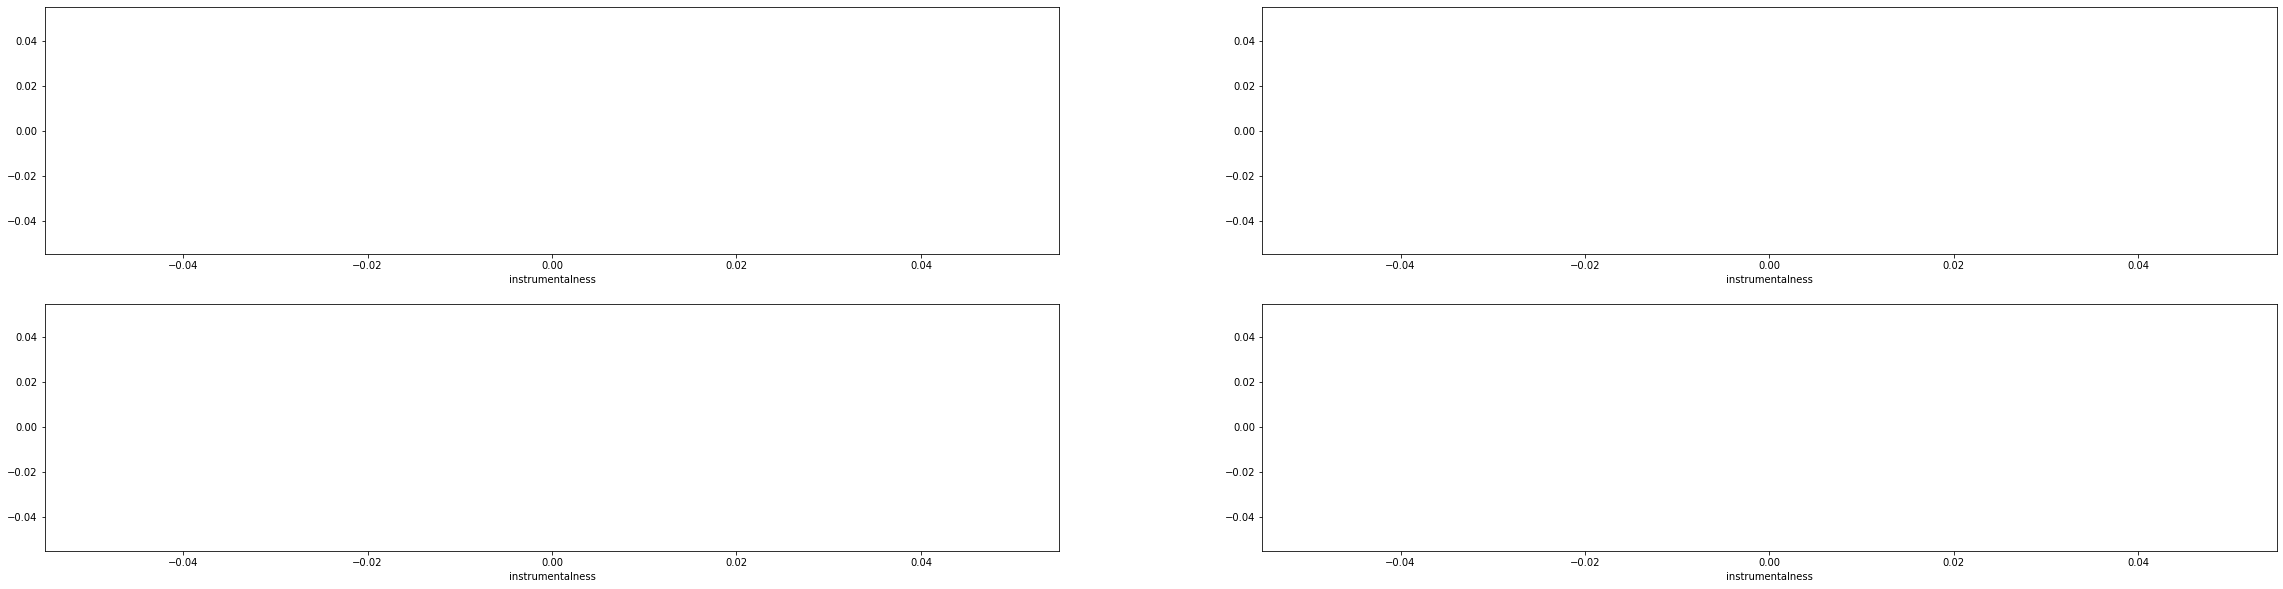

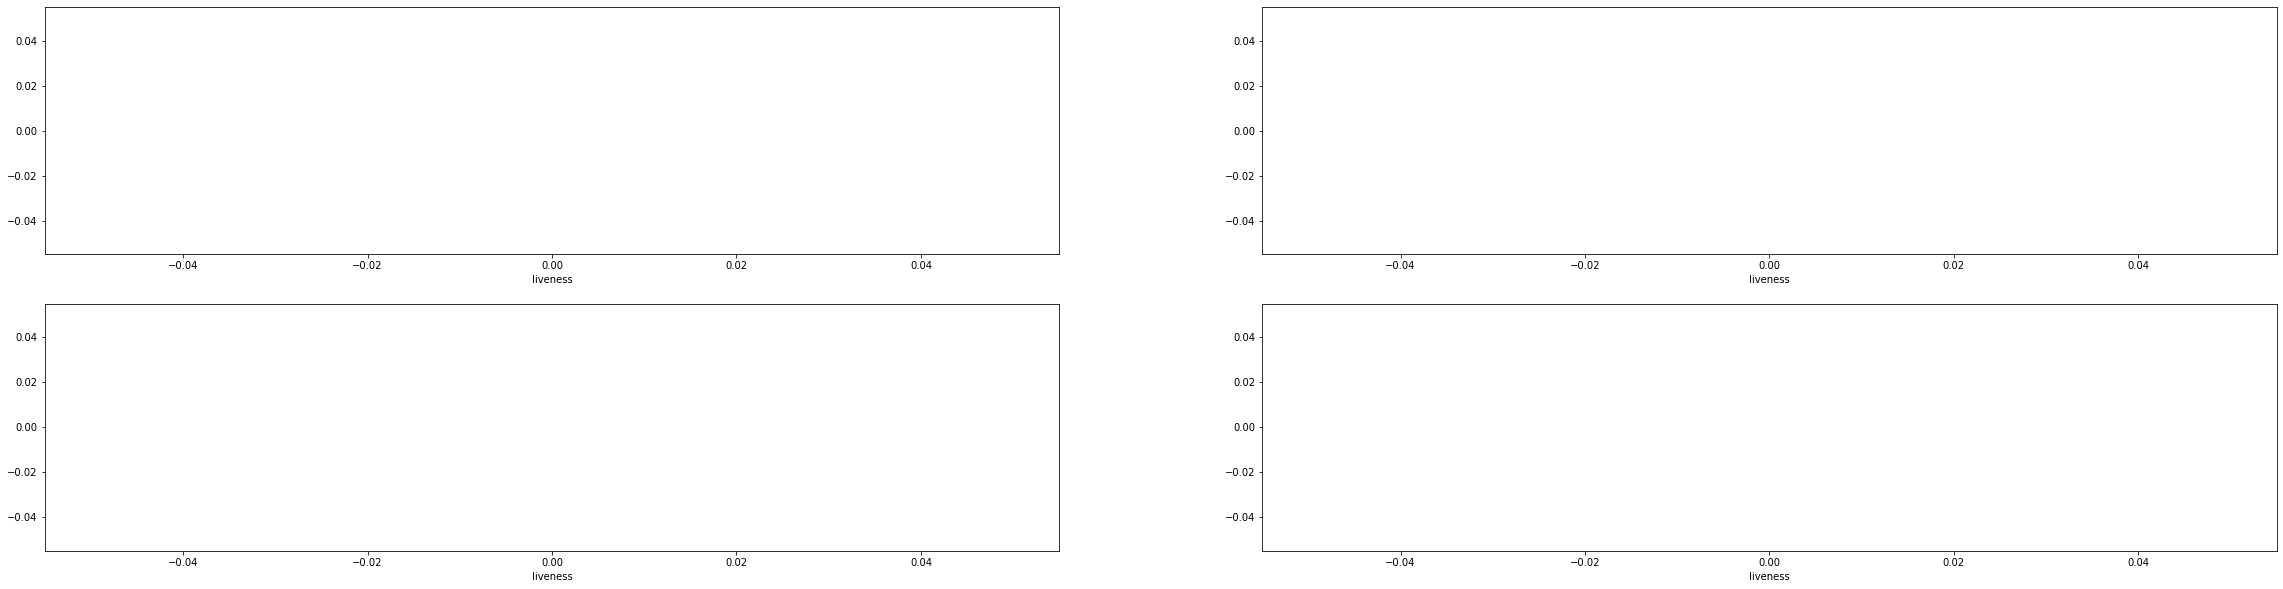

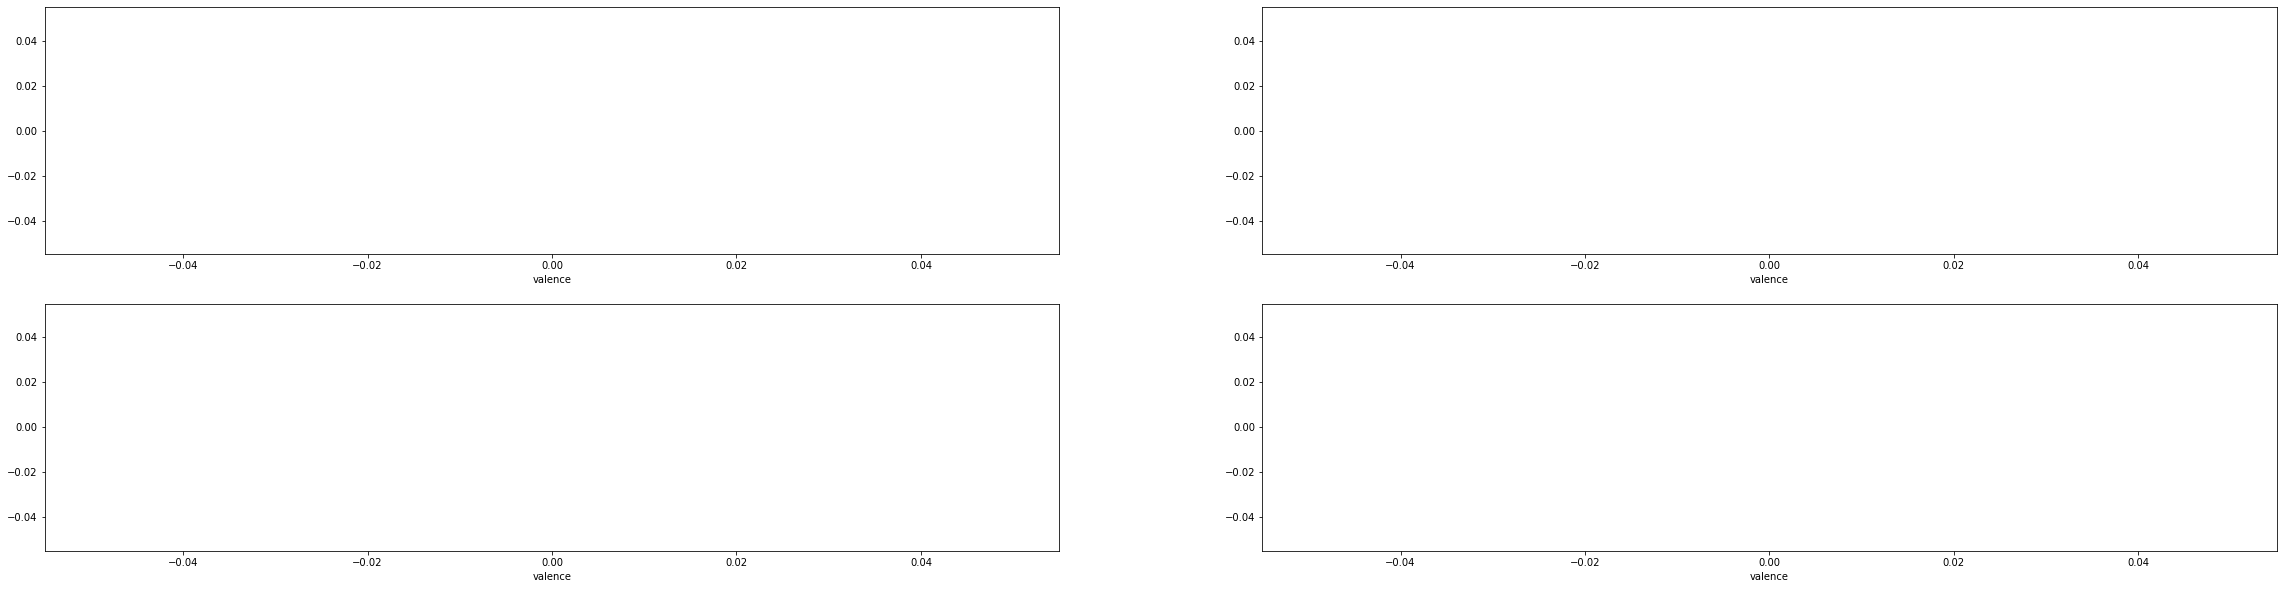

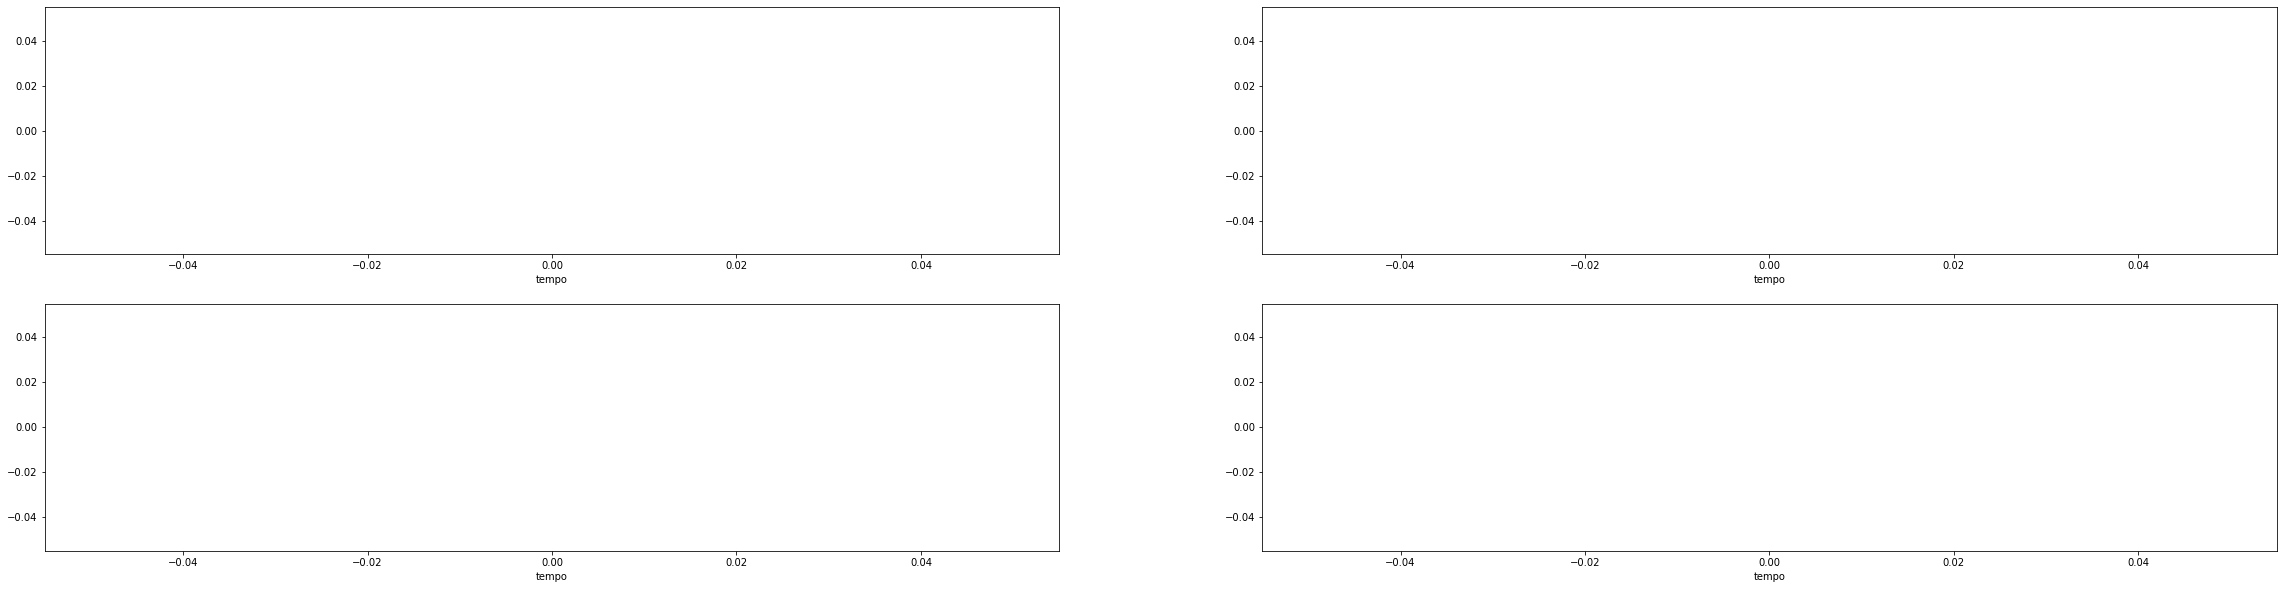

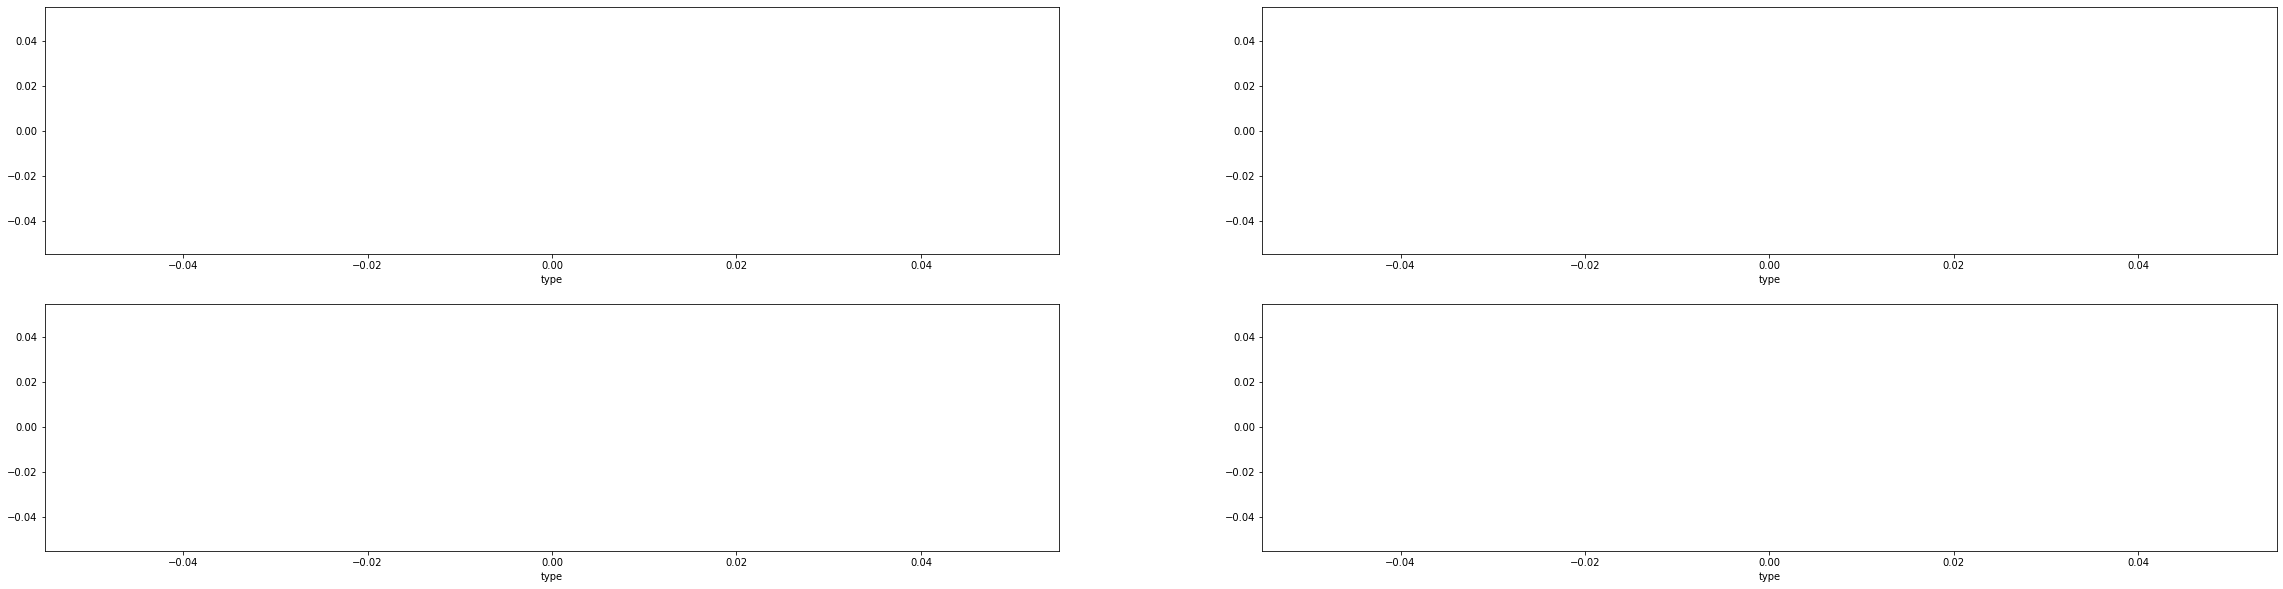

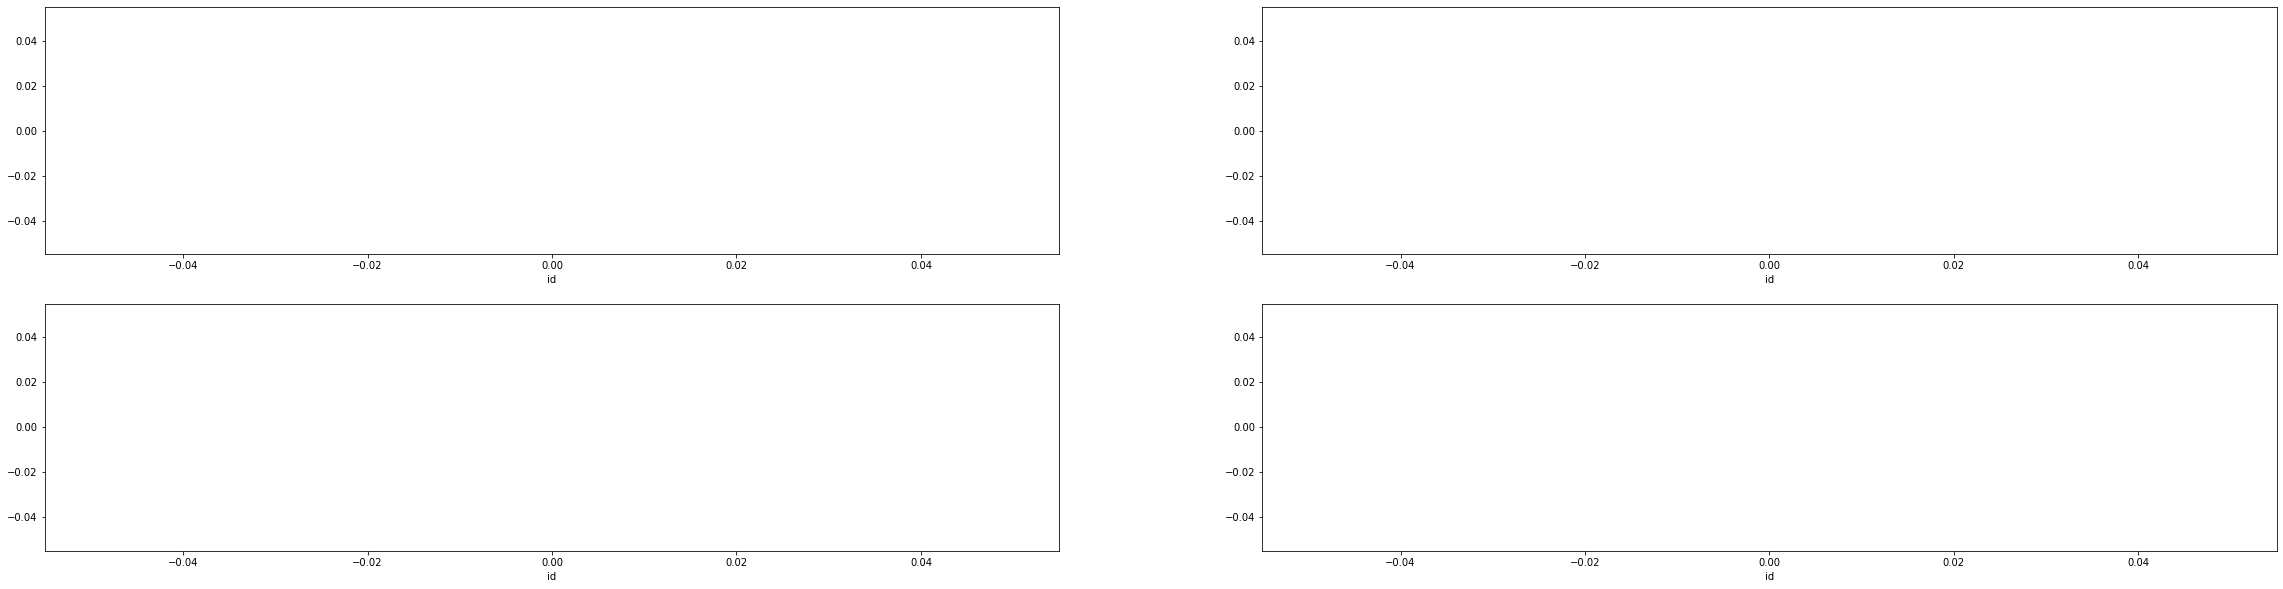

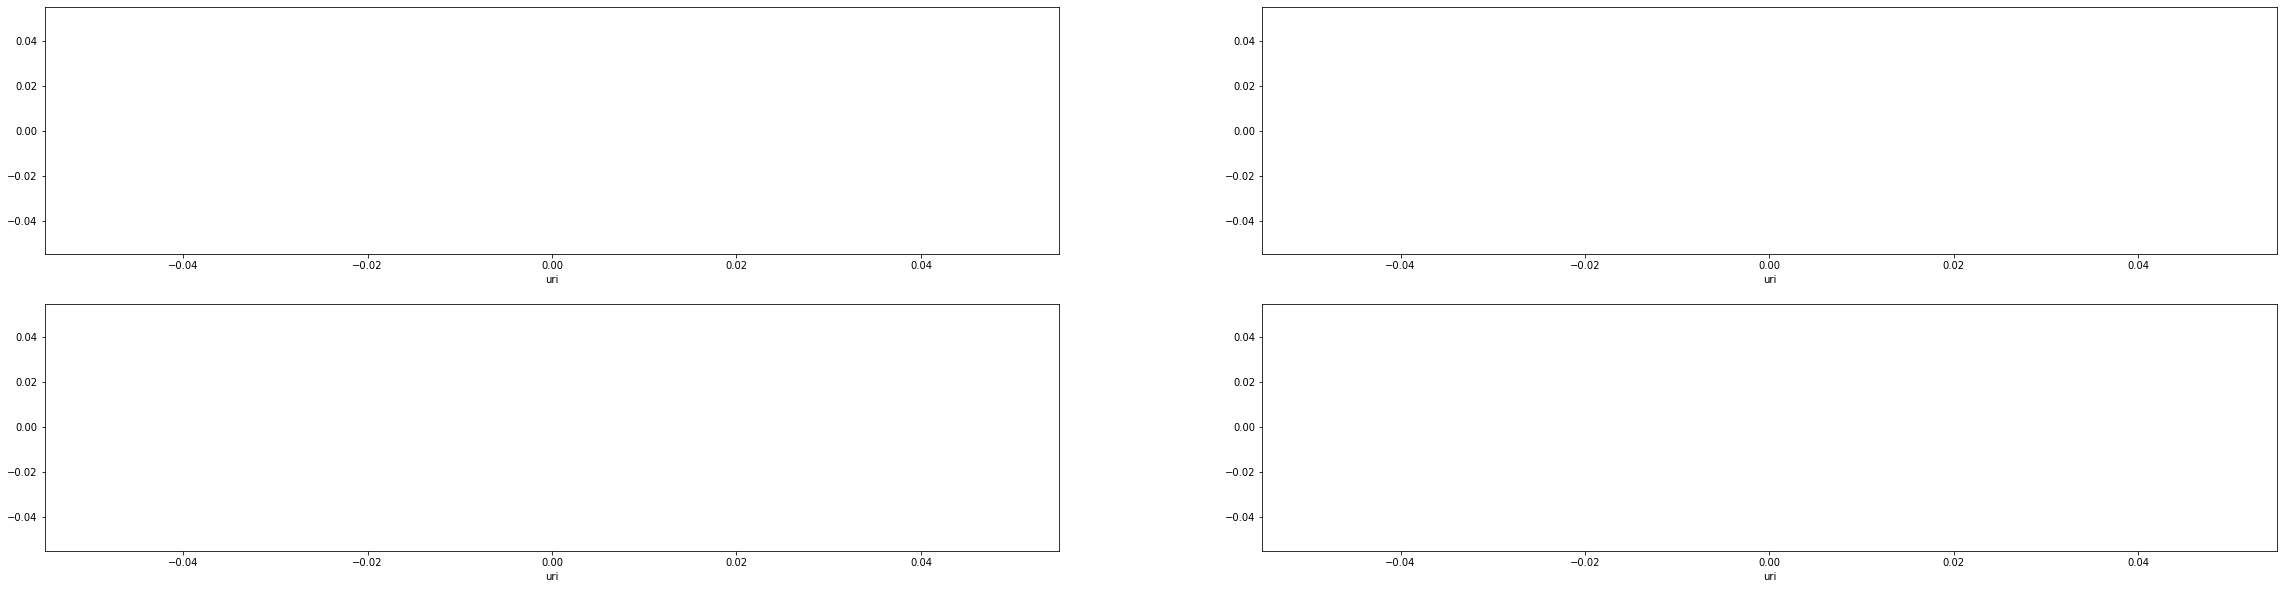

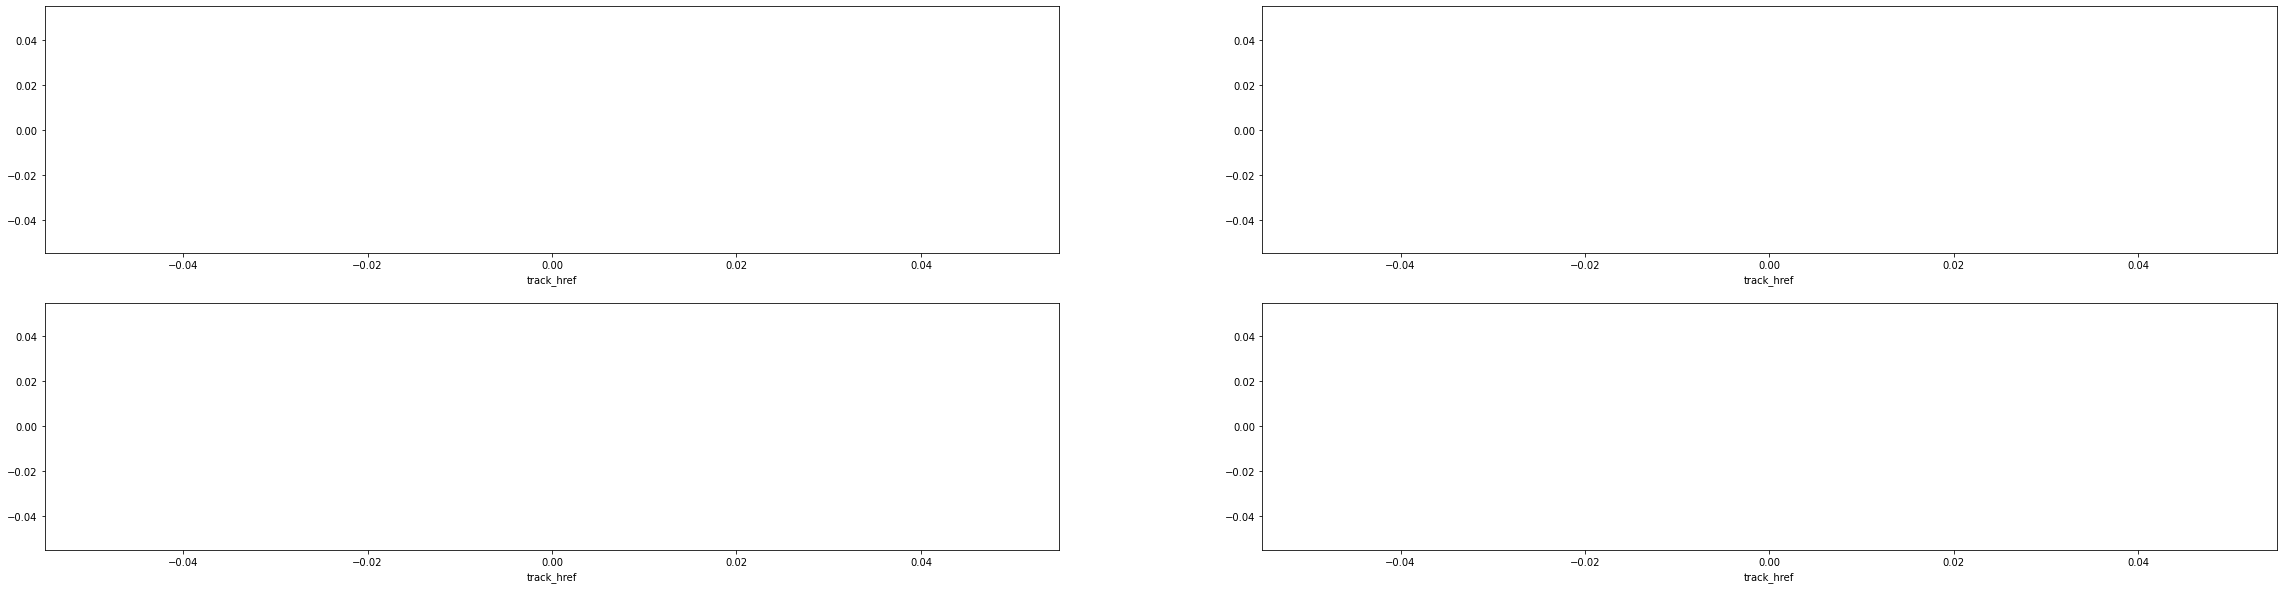

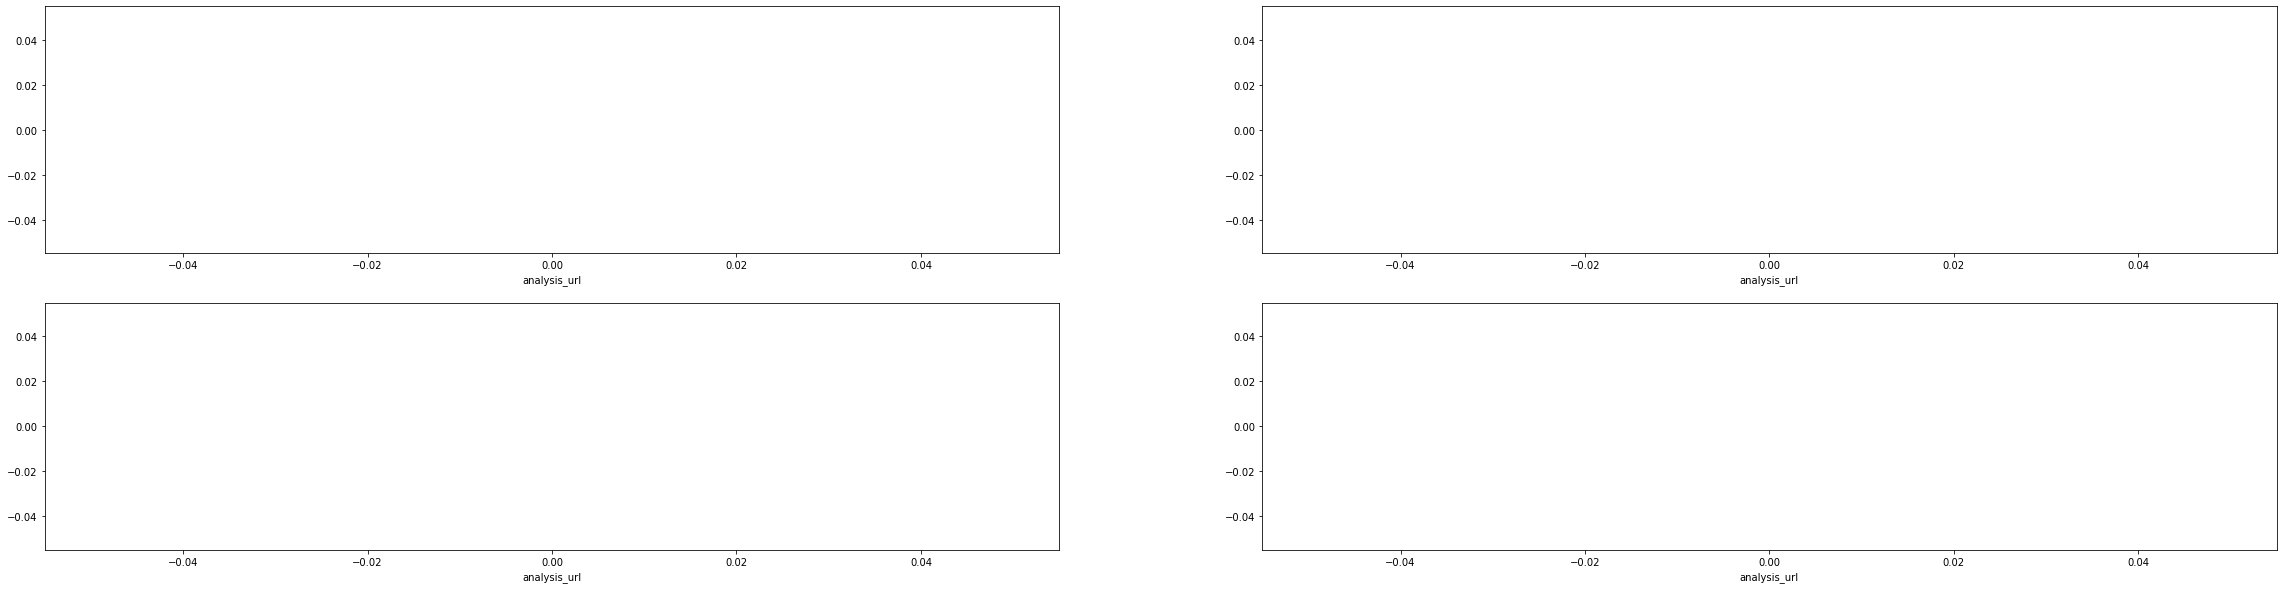

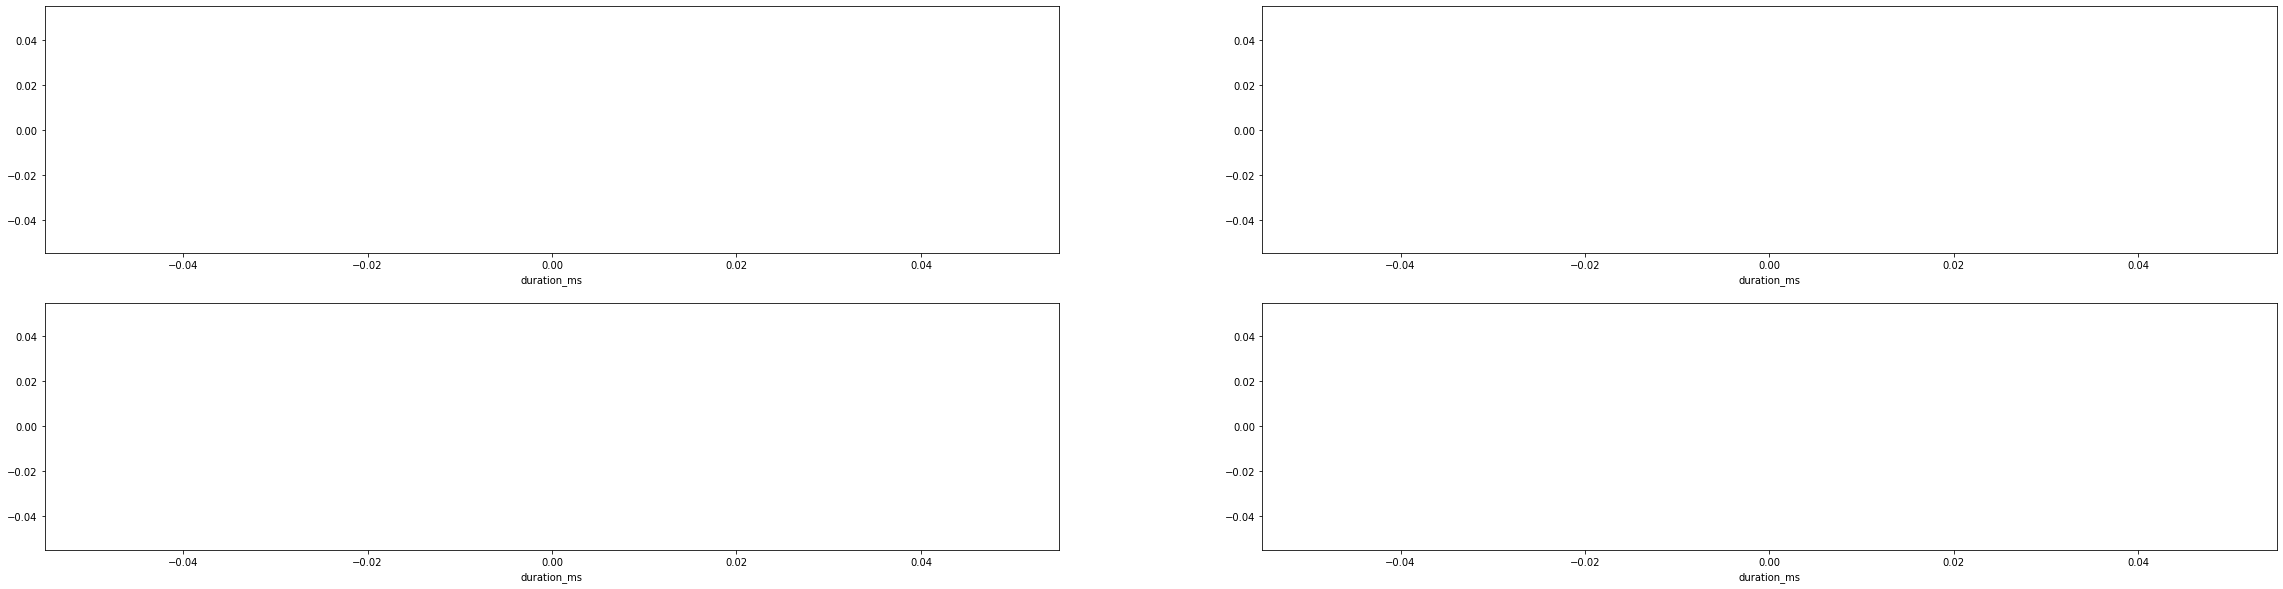

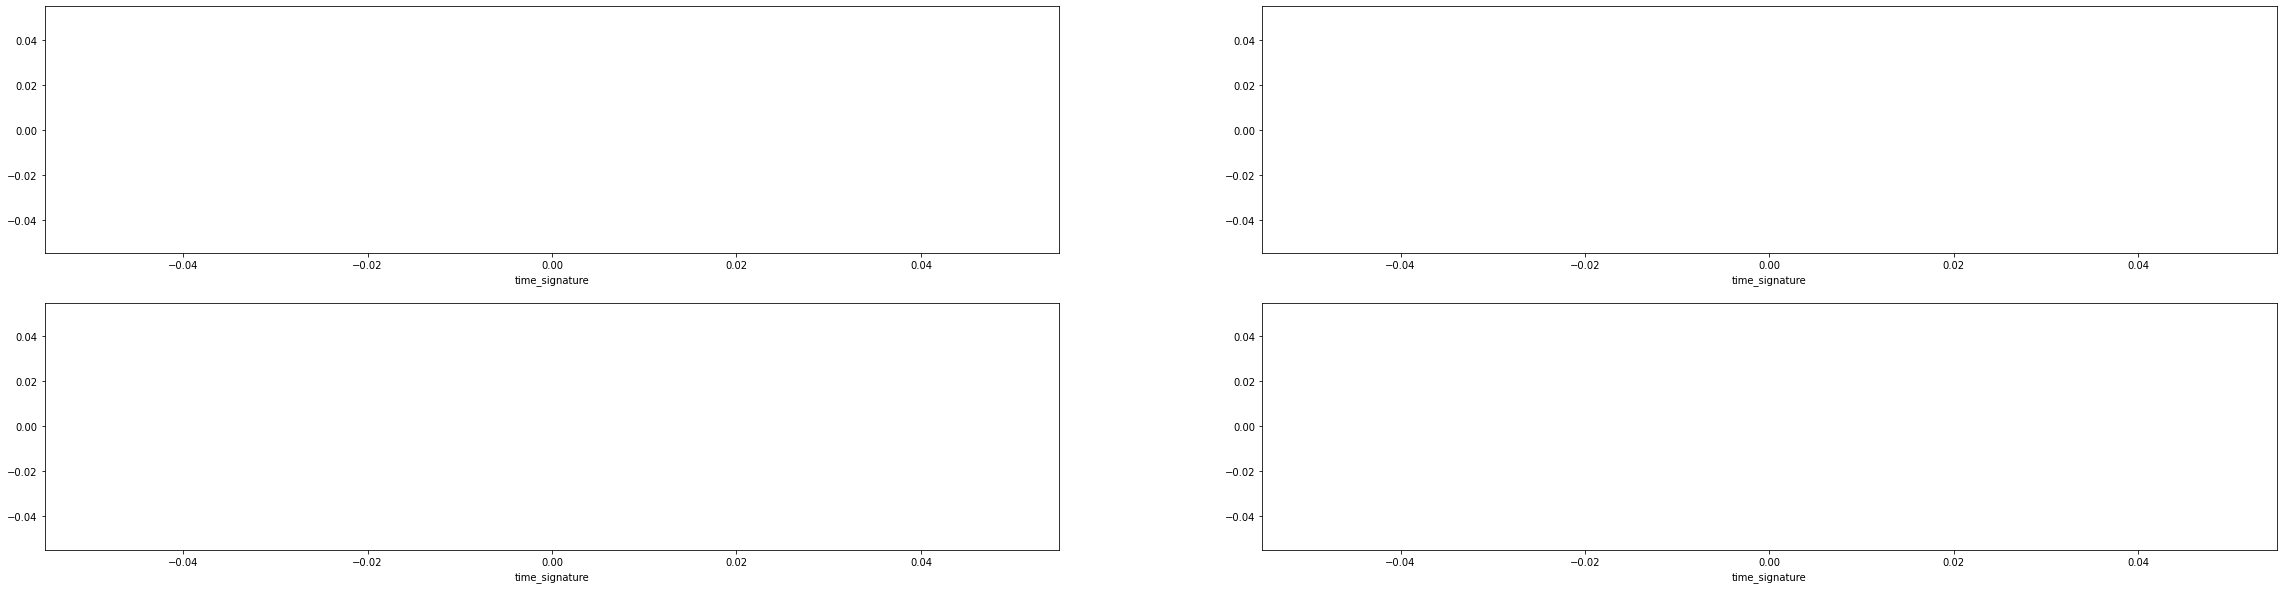

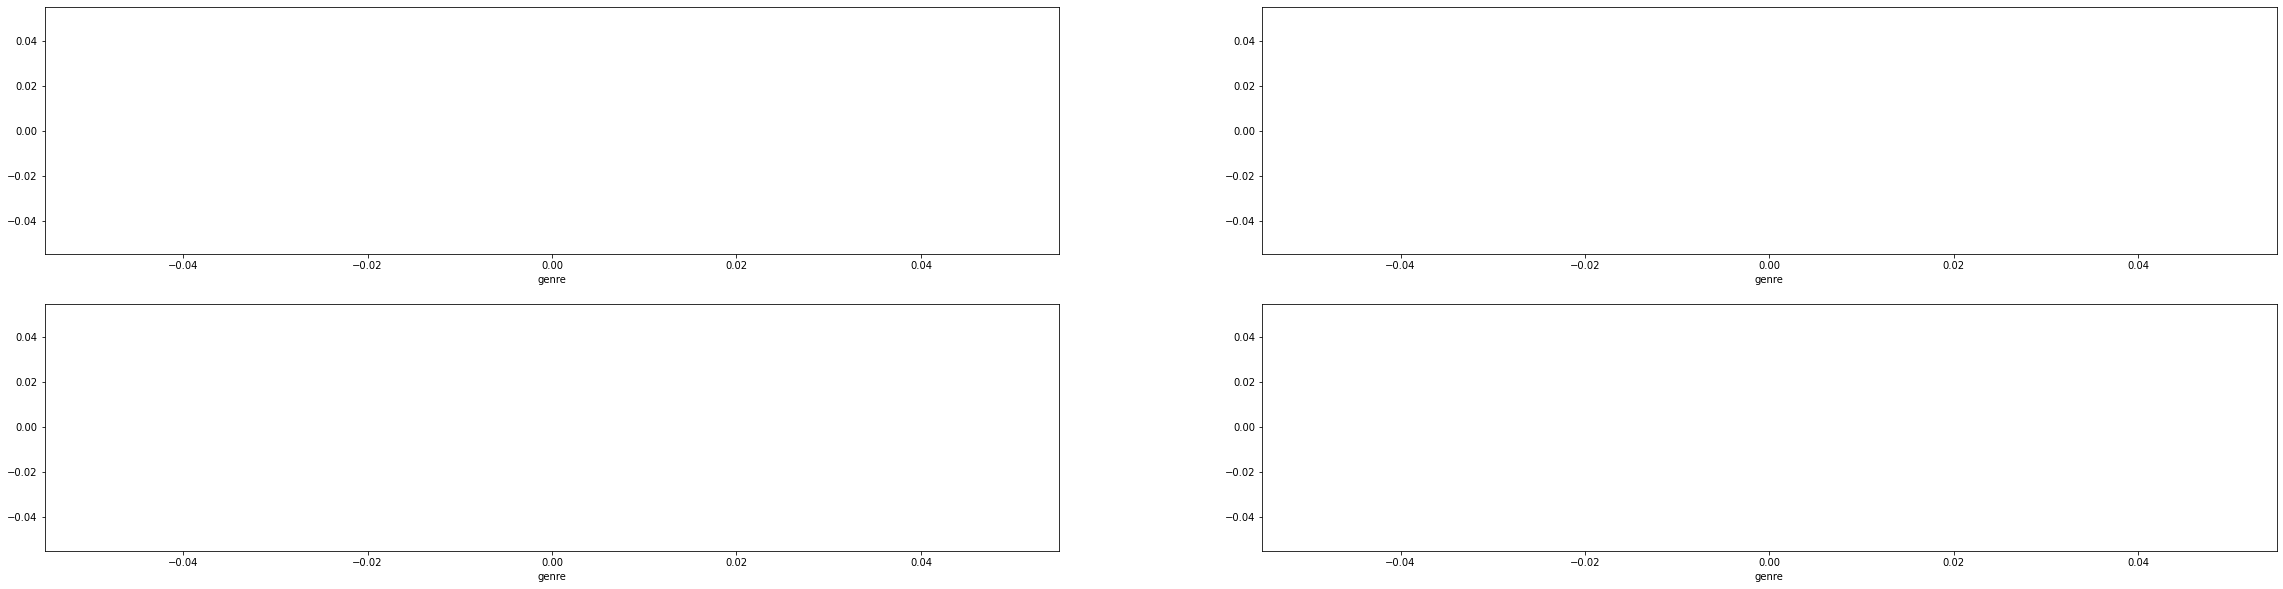

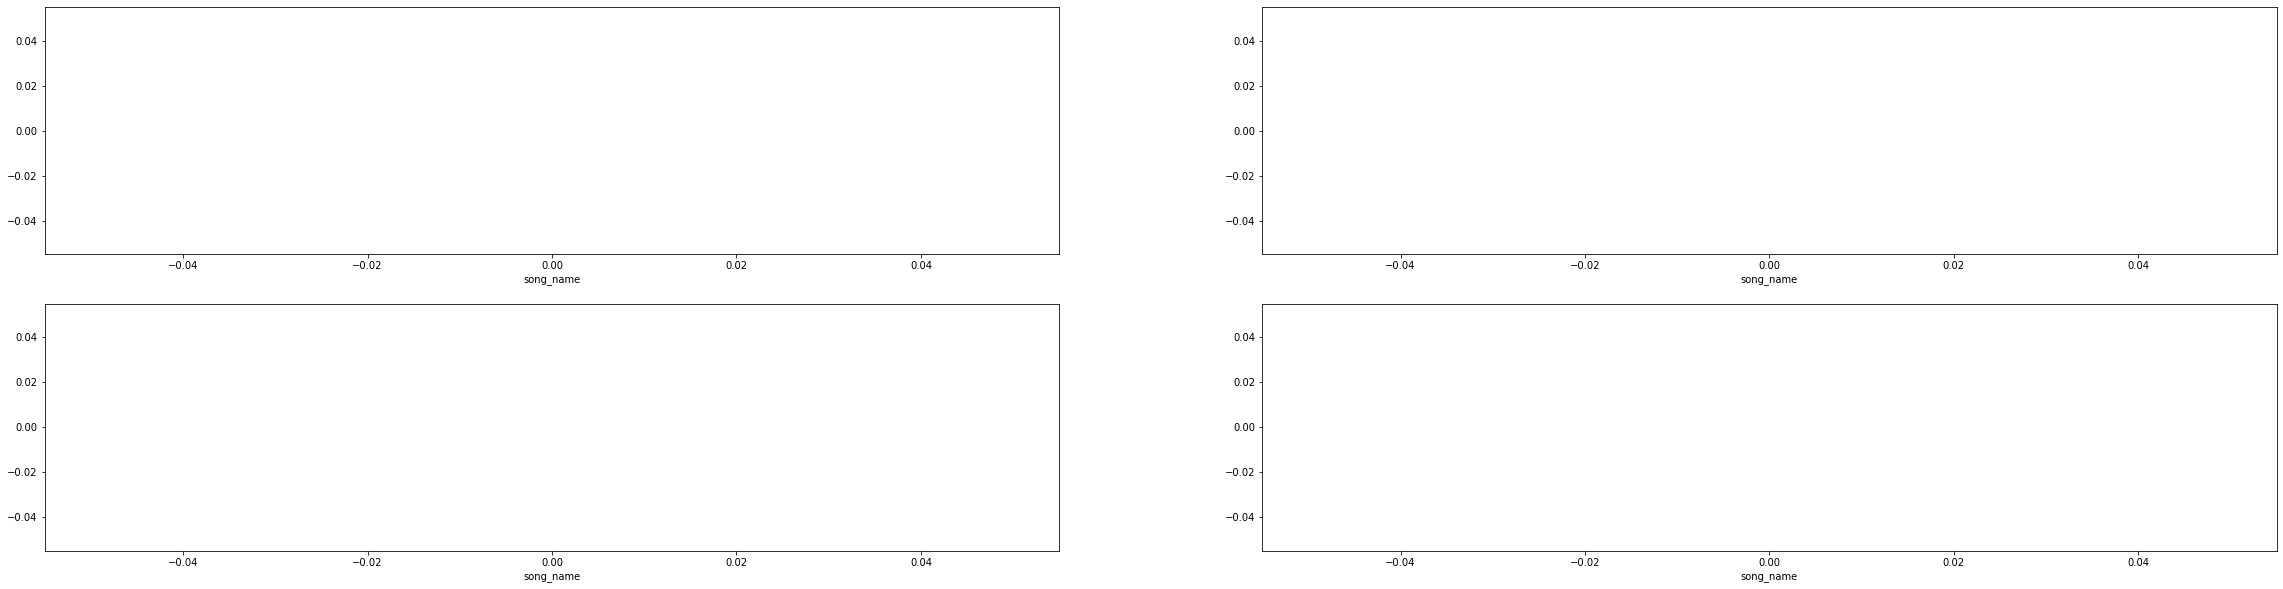

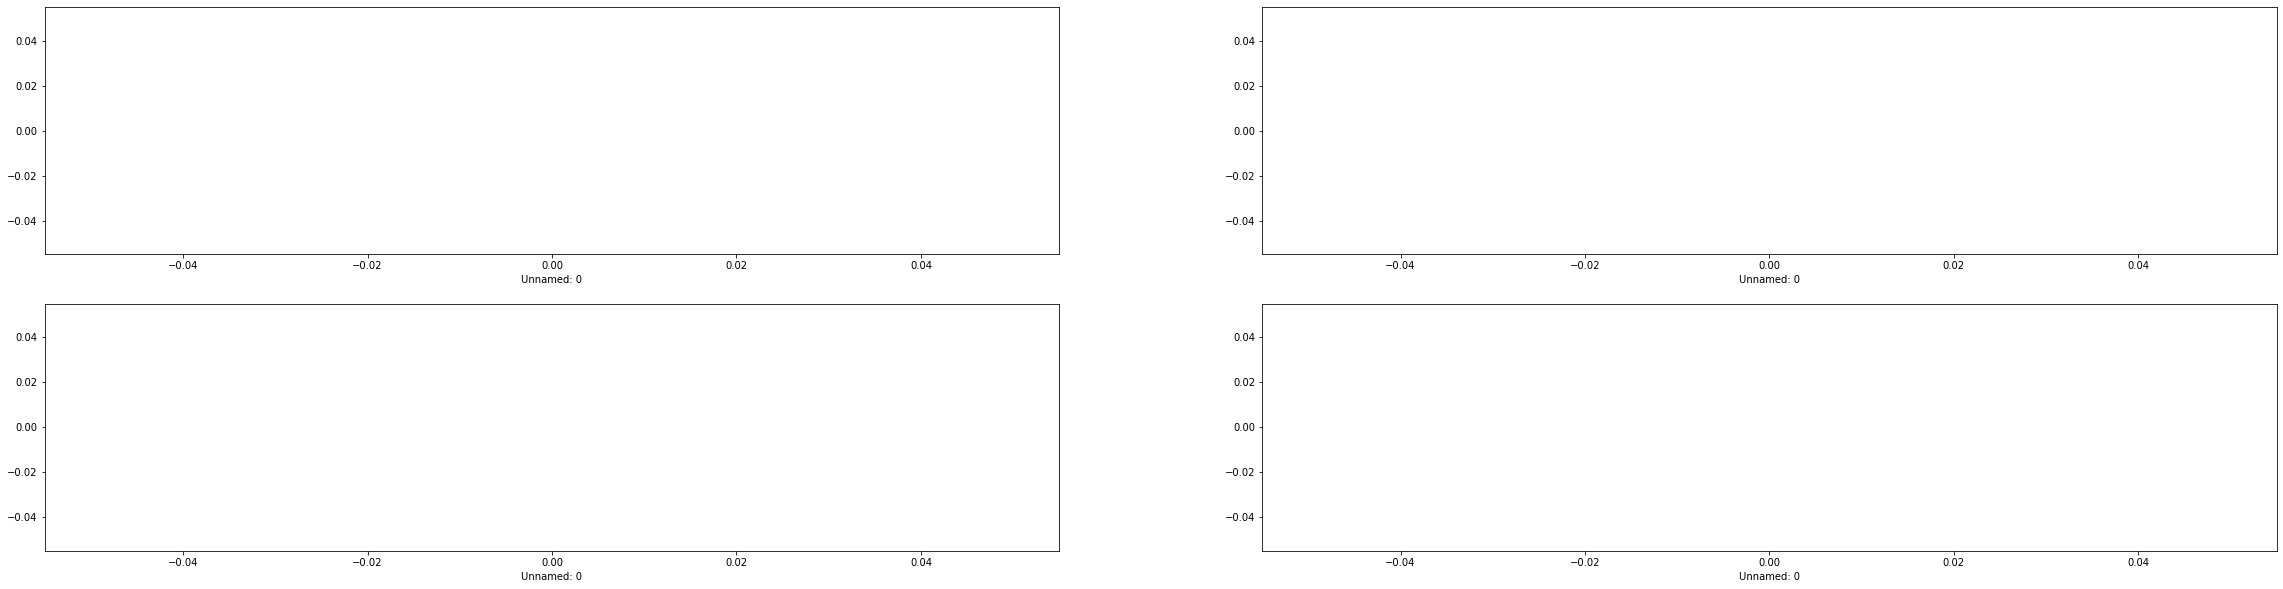

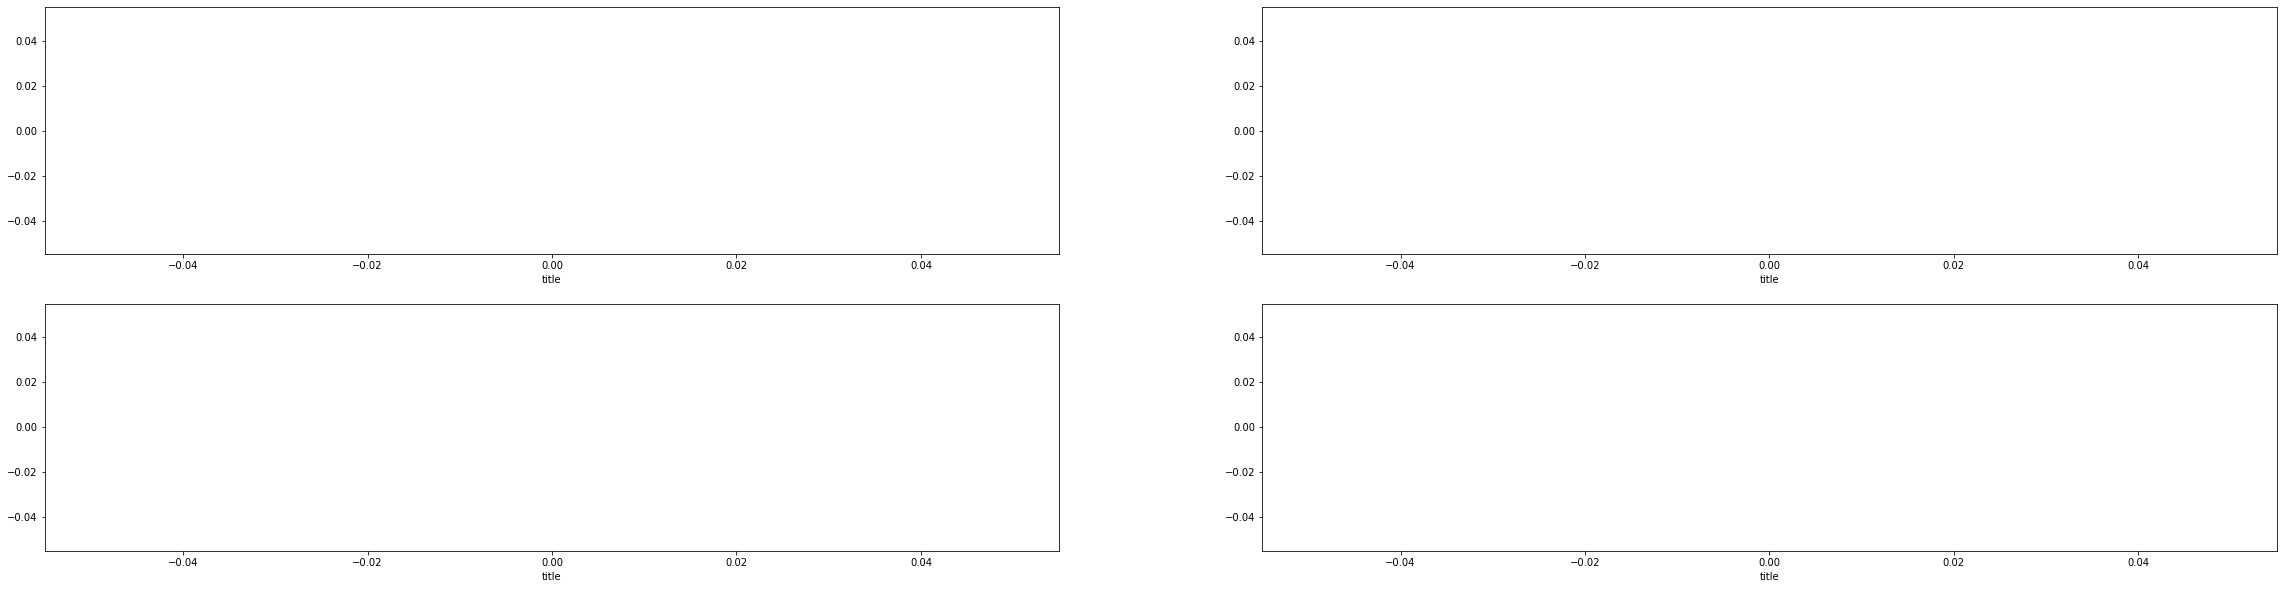

In [5]:
# Check distribution difference of Genre 7,8,9,10
genres7 = df[df['genre'] == 7]
genres8 = df[df['genre'] == 8]
genres9 = df[df['genre'] == 9]
genres10 = df[df['genre'] == 10]

for col in genres7.columns:
    fig = plt.figure(figsize=(40,10)) 
    plt.subplot(2, 2, 1)
    sns.distplot(genres7[col] , color="skyblue", label= col + "7")
    plt.subplot(2, 2, 2)
    sns.distplot(genres8[col], color="red", label= col + "8")
    plt.subplot(2,2,3)
    sns.distplot(genres9[col], color="green", label= col + "9")
    plt.subplot(2,2,4)
    sns.distplot(genres10[col], color="blue", label= col + "10")

# 1-1. Preprocessing

In [ ]:
#Columns 확인
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')

In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Change 'genre'(y) to categorical variable (label encoding)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])

In [ ]:
# Make X, y data 
spotify_target = df[['genre']].copy()
spotify_data = df.copy()

del spotify_data['genre']

In [ ]:
# X data head
spotify_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


In [ ]:
# y data head
spotify_target.head()

,genre
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Save data(X,y) to csv 
X_data = spotify_data
y_data = spotify_target
X_data.to_csv("/content/drive/My Drive/semi3/HSK/X_data.csv", index=False, header=True)
y_data.to_csv("/content/drive/My Drive/semi3/HSK/y_data.csv", index=False, header=True)

# 2. ML: Gradient Boosting Classification

In [11]:
# Set Parameters
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

In [12]:
# Create Pipeline to preprocess data 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import ensemble

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo','duration_ms']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['key','mode','time_signature']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Now we have a full prediction pipeline with model 
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ensemble.GradientBoostingClassifier(**params))])

In [17]:
# Split train, test data / Print shape of each
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(spotify_data, spotify_target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(29613, 13)
(12692, 13)
(29613, 1)
(12692, 1)


In [ ]:
# Fit train data 
clf_fit = clf.fit(train_data, train_label.values.ravel())

In [19]:
# Accuracy score 
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_label.values.ravel(), clf.predict(test_data))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.6826


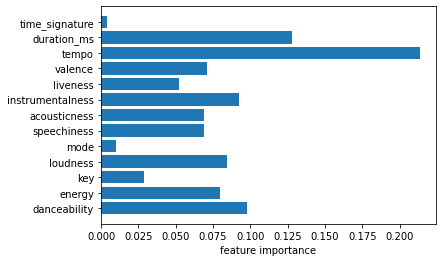

In [27]:
# Feature importance 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(train_data, train_label.values.ravel())

def plot_feature_importances(model):
    n_features = train_data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_data.columns)
    plt.xlabel("feature importance")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

# 2-1. PyCaret

In [ ]:
# !pip install pycaret==2.1.2
from pycaret.classification import *

In [ ]:
# Drop columns that are unnecessary
df_cleaned = df.drop(["title","Unnamed: 0","song_name","analysis_url","track_href","uri","id","type", "key","mode","time_signature"],axis=1)
df_cleaned.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,Dark Trap
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,Dark Trap
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,Dark Trap
3,0.476,0.781,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,Dark Trap
4,0.798,0.624,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,Dark Trap


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cleaned['genre'] = le.fit_transform(df_cleaned['genre'])
df_cleaned[:100]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0.831,0.814,-7.364,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,124539,0
1,0.719,0.493,-7.230,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,224427,0
2,0.850,0.893,-4.783,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,98821,0
3,0.476,0.781,-4.710,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,123661,0
4,0.798,0.624,-7.668,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,123298,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.888,0.906,-4.028,0.3650,0.22100,0.000474,0.2660,0.4770,125.033,137822,0
96,0.816,0.620,-7.804,0.5100,0.25500,0.000011,0.2510,0.2650,144.981,184733,0
97,0.713,0.839,-6.377,0.3490,0.00417,0.706000,0.1060,0.0369,150.004,149230,0
98,0.449,0.645,-4.784,0.0366,0.00956,0.008460,0.1070,0.0589,219.692,207442,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   loudness          42305 non-null  float64
 3   speechiness       42305 non-null  float64
 4   acousticness      42305 non-null  float64
 5   instrumentalness  42305 non-null  float64
 6   liveness          42305 non-null  float64
 7   valence           42305 non-null  float64
 8   tempo             42305 non-null  float64
 9   duration_ms       42305 non-null  int64  
 10  genre             42305 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 3.6 MB


In [ ]:
df_cleaned['duration_ms'] =df_cleaned['duration_ms'].astype('float')

In [ ]:
## Setup model 
model = setup(data=df_cleaned, 
              target='genre', 
              train_size=0.7, # default value
              session_id=123) # Random seed 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"0: 0, 1: 1, 10: 2, 11: 3, 12: 4, 13: 5, 14: 6, 2: 7, 3: 8, 4: 9, 5: 10, 6: 11, 7: 12, 8: 13, 9: 14"
3,Original Data,"(42305, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
# Produce top 3 models: Gradient Boosting Classifier ranks highest
top_3_models = compare_models(sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
                              n_select = 3) # Select top n models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6872,0.0000,0.6389,0.6927,0.6797,0.6584,0.6606,121.3264
1,Extreme Gradient Boosting,0.6811,0.0000,0.6265,0.6907,0.6706,0.6513,0.6545,16.0759
2,Light Gradient Boosting Machine,0.6807,0.0000,0.6402,0.6818,0.6767,0.6517,0.6532,4.4865
3,CatBoost Classifier,0.6798,0.0000,0.6413,0.6802,0.6753,0.6508,0.6521,89.4691
4,Extra Trees Classifier,0.6589,0.0000,0.6180,0.6529,0.6516,0.6280,0.6290,2.6494
5,Random Forest Classifier,0.6400,0.0000,0.6052,0.6343,0.6355,0.6081,0.6084,0.7130
6,Quadratic Discriminant Analysis,0.6205,0.0000,0.5900,0.6262,0.6124,0.5876,0.5898,0.0232
7,Decision Tree Classifier,0.5737,0.0000,0.5526,0.5739,0.5731,0.5377,0.5379,0.4427
8,Linear Discriminant Analysis,0.5231,0.0000,0.4781,0.5267,0.5128,0.4807,0.4826,0.0743
9,Naive Bayes,0.4959,0.0000,0.4357,0.4528,0.4275,0.4470,0.4573,0.0118


In [ ]:
# Print top 3 models
top_3_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
               n

# 3-0. DL : Preprocessing 

In [ ]:
#Bring Data
X_data = pd.read_csv("/content/drive/My Drive/semi3/HSK/X_data.csv", encoding='utf-8')
y_data = pd.read_csv("/content/drive/My Drive/semi3/HSK/y_data.csv", encoding='utf-8')

In [ ]:
#Check X Data
X_data.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4


In [ ]:
#Check y Data
y_data.head(3)

,genre
0,0
1,0
2,0


In [ ]:
# Split train, test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(29613, 13) (29613, 1) (12692, 13) (12692, 1)


In [ ]:
# Scale and One-hot encode according to categorical/numerical variable selection

from sklearn.preprocessing import StandardScaler,OneHotEncoder #MinMaxScaler
columns_to_encode = ['mode', 'key','time_signature'] 
columns_to_scale = ['danceability', 'energy', 'loudness','speechiness','acousticness',
                       'instrumentalness','liveness','valence','tempo','duration_ms']
# Instantiate encoder/scaler
sc = StandardScaler()
ohe = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns

X_train_scaled = sc.fit_transform(X_train[columns_to_scale])
X_test_scaled = sc.transform(X_test[columns_to_scale])
X_train_encoded= ohe.fit_transform(X_train[columns_to_encode])
X_test_encoded = ohe.transform(X_test[columns_to_encode])

X_train_pro= np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_pro = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

y_train_pro = ohe.fit_transform(y_train)
y_test_pro = ohe.transform(y_test)

print(X_train_pro.shape)
print(X_test_pro.shape)
print(y_train_pro.shape)
print(y_test_pro.shape)

(29613, 28)
(12692, 28)
(29613, 15)
(12692, 15)


In [ ]:
# Save train, test set (standardized/one-hot encoded)
np.save('/content/drive/My Drive/semi3/HSK/X_train_pro.npy',X_train_pro)
np.save('/content/drive/My Drive/semi3/HSK/X_test_pro.npy',X_test_pro)
np.save('/content/drive/My Drive/semi3/HSK/y_train_pro.npy',y_train_pro)
np.save('/content/drive/My Drive/semi3/HSK/y_test_pro.npy',y_test_pro)

# Load Saved Data for DL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load train, test data set
X_train = np.load('/content/drive/My Drive/semi3/HSK/X_train_pro.npy')
X_test = np.load('/content/drive/My Drive/semi3/HSK/X_test_pro.npy')
y_train = np.load('/content/drive/My Drive/semi3/HSK/y_train_pro.npy')
y_test = np.load('/content/drive/My Drive/semi3/HSK/y_test_pro.npy')
X_train.shape

(29613, 28)

In [ ]:
#Import EDA (exploratory data analysis) and plotting library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
#Import Keras DL modules
import tensorflow as tf

# tf.keras 에 필요한 함수들이 모여있습니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 

In [ ]:
#Get rid of errors
import os
# tf.logging.set_verbosity(tf.logging.ERROR)
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(29613, 28) (29613, 15) (12692, 28) (12692, 15)


In [ ]:
# F1 score -- at tensorflow 2.0 

from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

# 3-1-1. DL Keras Model

In [ ]:
# Early stopping model 
# monitor: early stopping을 결정하는 기준
# min_delta: 이거보다 변화가 작으면 멈춘다.
# patience: 이 숫자의 epoch만큼 변하지 개선(감소)되지 않으면 멈춘다. (2로 설정시, 2연속 val_loss가 증가하면 train 중지)

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Checkpoint로 저장

# https://keras.io/callbacks/#modelcheckpoint
import os
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/drive/My Drive/semi3/HSK/training1/cp-{epoch:04d}.ckpt" #파일 저장 경로 변경하기
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path, verbose=1, 
                              save_weights_only=True, period=1, save_best_only=True)

In [ ]:
# Define model with 3 layers
def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim= 28, kernel_initializer=initializers.he_uniform()))
    model.add(Dense(units=64, activation='relu', kernel_initializer=initializers.he_uniform()))
    model.add(Dense(units=128, activation='relu', kernel_initializer=initializers.he_uniform()))
    model.add(Dense(units=15, activation='softmax'))
    #model.add(layers.Dropout(rate=0.5)) # Dropout-layer
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), # can change lr
                  loss='categorical_crossentropy',
                 metrics=['accuracy', precision, recall, f1score])
                # , precision_score, recall_score, f1_score <- tensorflow 1.0 에서만 가능

    return model

In [ ]:
# Summary of model
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                928       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 15)                1935      
Total params: 13,295
Trainable params: 13,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#1) Without Early stopping: Batch size =256
history = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.3)

Epoch 1/20
81/81 [==============================] - 1s 7ms/step - loss: 2.4087 - accuracy: 0.2374 - precision: 0.2919 - recall: 0.0288 - f1score: 0.0489 - val_loss: 1.5024 - val_accuracy: 0.4970 - val_precision: 0.7238 - val_recall: 0.2559 - val_f1score: 0.3776
Epoch 2/20
81/81 [==============================] - 0s 4ms/step - loss: 1.4056 - accuracy: 0.5304 - precision: 0.7331 - recall: 0.3007 - f1score: 0.4249 - val_loss: 1.2663 - val_accuracy: 0.5690 - val_precision: 0.7372 - val_recall: 0.3847 - val_f1score: 0.5052
Epoch 3/20
81/81 [==============================] - 0s 4ms/step - loss: 1.2295 - accuracy: 0.5794 - precision: 0.7484 - recall: 0.4010 - f1score: 0.5217 - val_loss: 1.1738 - val_accuracy: 0.5974 - val_precision: 0.7618 - val_recall: 0.4256 - val_f1score: 0.5459
Epoch 4/20
81/81 [==============================] - 0s 4ms/step - loss: 1.1411 - accuracy: 0.6027 - precision: 0.7734 - recall: 0.4437 - f1score: 0.5635 - val_loss: 1.1165 - val_accuracy: 0.6106 - val_precision: 0.

In [ ]:
#2) Without Early stopping: batch size =512
history = model.fit(X_train, y_train, batch_size=512, epochs=20, validation_split=0.3)

Epoch 1/20
41/41 [==============================] - 0s 9ms/step - loss: 0.8616 - accuracy: 0.6893 - precision: 0.8171 - recall: 0.5689 - f1score: 0.6705 - val_loss: 0.9631 - val_accuracy: 0.6530 - val_precision: 0.7837 - val_recall: 0.5419 - val_f1score: 0.6407
Epoch 2/20
41/41 [==============================] - 0s 5ms/step - loss: 0.8573 - accuracy: 0.6896 - precision: 0.8240 - recall: 0.5655 - f1score: 0.6705 - val_loss: 0.9569 - val_accuracy: 0.6549 - val_precision: 0.7872 - val_recall: 0.5467 - val_f1score: 0.6452
Epoch 3/20
41/41 [==============================] - 0s 5ms/step - loss: 0.8540 - accuracy: 0.6921 - precision: 0.8211 - recall: 0.5691 - f1score: 0.6720 - val_loss: 0.9585 - val_accuracy: 0.6516 - val_precision: 0.7894 - val_recall: 0.5377 - val_f1score: 0.6396
Epoch 4/20
41/41 [==============================] - 0s 5ms/step - loss: 0.8516 - accuracy: 0.6923 - precision: 0.8229 - recall: 0.5703 - f1score: 0.6735 - val_loss: 0.9578 - val_accuracy: 0.6536 - val_precision: 0.

In [ ]:
#3) With Early stopping: batch size = 256
history= model.fit(X_train, y_train, batch_size=256, epochs=20, callbacks = [es], validation_split=0.3) 

Epoch 1/20
81/81 [==============================] - 0s 5ms/step - loss: 0.8331 - accuracy: 0.6946 - precision: 0.8215 - recall: 0.5828 - f1score: 0.6814 - val_loss: 0.9595 - val_accuracy: 0.6538 - val_precision: 0.7860 - val_recall: 0.5519 - val_f1score: 0.6483
Epoch 2/20
81/81 [==============================] - 0s 4ms/step - loss: 0.8302 - accuracy: 0.6984 - precision: 0.8204 - recall: 0.5825 - f1score: 0.6810 - val_loss: 0.9590 - val_accuracy: 0.6559 - val_precision: 0.7661 - val_recall: 0.5685 - val_f1score: 0.6525
Epoch 3/20
81/81 [==============================] - 0s 4ms/step - loss: 0.8248 - accuracy: 0.6991 - precision: 0.8264 - recall: 0.5887 - f1score: 0.6871 - val_loss: 0.9655 - val_accuracy: 0.6554 - val_precision: 0.7739 - val_recall: 0.5522 - val_f1score: 0.6442
Epoch 4/20
81/81 [==============================] - 0s 4ms/step - loss: 0.8211 - accuracy: 0.7023 - precision: 0.8206 - recall: 0.5872 - f1score: 0.6843 - val_loss: 0.9584 - val_accuracy: 0.6550 - val_precision: 0.

In [ ]:
#4) With Early stopping: batch size = 512
history= model.fit(X_train, y_train, batch_size=512, epochs=20, callbacks = [es, cp_callback], validation_split=0.3) 

Epoch 1/20
41/41 [==============================] - 0s 5ms/step - loss: 0.8010 - accuracy: 0.7092 - precision: 0.8301 - recall: 0.5963 - f1score: 0.6938 - val_loss: 0.9521 - val_accuracy: 0.6580 - val_precision: 0.7781 - val_recall: 0.5611 - val_f1score: 0.6519

Epoch 00001: val_loss improved from inf to 0.95213, saving model to /content/drive/My Drive/semi3/HSK/training1/cp-0001.ckpt
Epoch 2/20
41/41 [==============================] - 0s 5ms/step - loss: 0.7926 - accuracy: 0.7119 - precision: 0.8369 - recall: 0.5993 - f1score: 0.6983 - val_loss: 0.9544 - val_accuracy: 0.6563 - val_precision: 0.7780 - val_recall: 0.5568 - val_f1score: 0.6490

Epoch 00002: val_loss did not improve from 0.95213
Epoch 3/20
41/41 [==============================] - 0s 5ms/step - loss: 0.7912 - accuracy: 0.7125 - precision: 0.8333 - recall: 0.6012 - f1score: 0.6983 - val_loss: 0.9552 - val_accuracy: 0.6548 - val_precision: 0.7822 - val_recall: 0.5543 - val_f1score: 0.6488

Epoch 00003: val_loss did not impro

In [ ]:
# Save Best Model
model.save('/content/drive/My Drive/semi3/HSK/training1/my_model_1.h5')

In [ ]:
# "Evaluate" the model on test data

_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

397/397 [==============================] - 1s 2ms/step - loss: 0.9439 - accuracy: 0.6675 - precision: 0.7753 - recall: 0.5721 - f1score: 0.6565
loss: 0.944, accuracy: 0.668, precision: 0.775, recall: 0.572, f1score: 0.656


In [ ]:
# Call Back checkpoint: evaluate 

model = create_model()
model.load_weights('/content/drive/My Drive/semi3/HSK/training1/cp-0001.ckpt')
_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test,  y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

397/397 [==============================] - 1s 2ms/step - loss: 0.9408 - accuracy: 0.6610 - precision: 0.7854 - recall: 0.5622 - f1score: 0.6531
loss: 0.940, accuracy: 0.665, precision: 0.787, recall: 0.563, f1score: 0.654


# 3-1-2. DL Keras Model: **Best**

In [ ]:
#EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)

# Checkpoint로 저장

#https://keras.io/callbacks/#modelcheckpoint
import os
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/drive/My Drive/semi3/HSK/training2/cp-{epoch:04d}.ckpt" #파일 저장 경로 변경하기
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path, verbose=1, 
                              save_weights_only=True, period=1, save_best_only=True)

In [ ]:
# Learning rate scheduler 사용: epoch의 값에 따라 learning_rate가 변하는 함수
lr =0.01
def my_schedule(epoch, learning_rate=lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(0.1 * (5- epoch)))


from tensorflow.keras.callbacks import LearningRateScheduler
lr_schedule_custom = LearningRateScheduler(my_schedule)

In [ ]:
# Define model

def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim= 28, kernel_initializer=initializers.glorot_uniform())) #glorot, he
    #model.add(layers.Dropout(rate=0.2))
    #model.add(BatchNormalization())
    model.add(Dense(units=64, activation='relu', kernel_initializer=initializers.glorot_uniform()))
    #model.add(layers.Dropout(rate=0.2))
    #model.add(BatchNormalization())
    model.add(Dense(units=128, activation='relu', kernel_initializer=initializers.glorot_uniform()))
    #model.add(layers.Dropout(rate=0.2))
    #model.add(BatchNormalization())
    #model.add(Dense(units=128, activation='relu', kernel_initializer=initializers.glorot_uniform()))
    model.add(Dense(units=15, activation='softmax'))
    #model.add(layers.Dropout(rate=0.2)) # Dropout-layer
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), # can change lr #Adadelta, Adagrad, RMSprop, SGD
                  loss='categorical_crossentropy',
                 metrics=['accuracy', precision, recall, f1score])
                # , precision_score, recall_score, f1_score <- tensorflow 1.0 에서만 가능

    return model

In [ ]:
# Summary of model
model = create_model()
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 32)                928       
_________________________________________________________________
dense_198 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_199 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_200 (Dense)            (None, 15)                1935      
Total params: 13,295
Trainable params: 13,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Best Model so far - saved (with early stopping, learning scheduler, callback saved)
history = model.fit(X_train, y_train, batch_size=512, epochs=30, validation_split=0.3, callbacks = [es, lr_schedule_custom, cp_callback])

Epoch 1/30
41/41 [==============================] - 0s 6ms/step - loss: 0.6953 - accuracy: 0.7350 - precision: 0.8234 - recall: 0.6536 - f1score: 0.7286 - val_loss: 1.1435 - val_accuracy: 0.6355 - val_precision: 0.7257 - val_recall: 0.5597 - val_f1score: 0.6319

Epoch 00001: val_loss improved from inf to 1.14351, saving model to /content/drive/My Drive/semi3/HSK/training2/cp-0001.ckpt
Epoch 2/30
41/41 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.7351 - precision: 0.8264 - recall: 0.6499 - f1score: 0.7274 - val_loss: 1.1906 - val_accuracy: 0.6425 - val_precision: 0.7167 - val_recall: 0.5823 - val_f1score: 0.6425

Epoch 00002: val_loss did not improve from 1.14351
Epoch 3/30
41/41 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.7414 - precision: 0.8300 - recall: 0.6557 - f1score: 0.7325 - val_loss: 1.1852 - val_accuracy: 0.6316 - val_precision: 0.7243 - val_recall: 0.5597 - val_f1score: 0.6314

Epoch 00003: val_loss did not impro

In [ ]:
# Evaluate Best model
loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test,  y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

397/397 [==============================] - 1s 2ms/step - loss: 1.1826 - accuracy: 0.6431 - precision: 0.7120 - recall: 0.5878 - f1score: 0.6428
loss: 1.183, accuracy: 0.643, precision: 0.712, recall: 0.588, f1score: 0.643


In [ ]:
# Save Best Model
model.save('/content/drive/My Drive/semi3/HSK/training2/my_model_2.h5')

# Call Back checkpoint: evaluate 
model = create_model()
model.load_weights('/content/drive/My Drive/semi3/HSK/training2/cp-0001.ckpt')
_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test,  y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

397/397 [==============================] - 1s 2ms/step - loss: 1.1577 - accuracy: 0.6282 - precision: 0.7240 - recall: 0.5583 - f1score: 0.6290
loss: 1.149, accuracy: 0.633, precision: 0.726, recall: 0.559, f1score: 0.630


# 3-1-3. DL model: Batch Normalization added

In [ ]:
from keras.layers import BatchNormalization

# Create model : with Batch Norm
def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim= 28, kernel_initializer=initializers.glorot_uniform()))
    #model.add(layers.Dropout(rate=0.2))
    model.add(BatchNormalization())
    model.add(Dense(units=64, activation='relu', kernel_initializer=initializers.glorot_uniform()))
    #model.add(layers.Dropout(rate=0.2))
    model.add(BatchNormalization())
    model.add(Dense(units=128, activation='relu', kernel_initializer=initializers.glorot_uniform()))
    #model.add(layers.Dropout(rate=0.2))
    model.add(BatchNormalization())
    #model.add(Dense(units=128, activation='relu', kernel_initializer=initializers.glorot_uniform()))
    model.add(Dense(units=15, activation='softmax'))
    #model.add(layers.Dropout(rate=0.2)) # Dropout-layer
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), # can change lr #Adadelta, Adagrad, RMSprop, SGD
                  loss='categorical_crossentropy',
                 metrics=['accuracy', precision, recall, f1score])
                # , precision_score, recall_score, f1_score <- tensorflow 1.0 에서만 가능

    return model

model = create_model()
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 32)                928       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_178 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_179 (Dense)            (None, 128)               8320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_180 (Dense)            (None, 15)              

In [ ]:
history = model.fit(X_train, y_train, batch_size=216, epochs=30, validation_split=0.3, callbacks = [lr_schedule_custom, es])

Epoch 1/30
96/96 [==============================] - 1s 6ms/step - loss: 0.7910 - accuracy: 0.7108 - precision: 0.8243 - recall: 0.6028 - f1score: 0.6960 - val_loss: 0.9946 - val_accuracy: 0.6590 - val_precision: 0.7527 - val_recall: 0.5867 - val_f1score: 0.6591
Epoch 2/30
96/96 [==============================] - 1s 6ms/step - loss: 0.7910 - accuracy: 0.7045 - precision: 0.8196 - recall: 0.6006 - f1score: 0.6930 - val_loss: 1.0000 - val_accuracy: 0.6538 - val_precision: 0.7538 - val_recall: 0.5713 - val_f1score: 0.6497
Epoch 3/30
96/96 [==============================] - 1s 6ms/step - loss: 0.7897 - accuracy: 0.7091 - precision: 0.8206 - recall: 0.6051 - f1score: 0.6962 - val_loss: 0.9941 - val_accuracy: 0.6577 - val_precision: 0.7573 - val_recall: 0.5736 - val_f1score: 0.6526
Epoch 4/30
96/96 [==============================] - 1s 6ms/step - loss: 0.7835 - accuracy: 0.7106 - precision: 0.8243 - recall: 0.6045 - f1score: 0.6972 - val_loss: 0.9922 - val_accuracy: 0.6540 - val_precision: 0.

In [ ]:
# Evaluate model
_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test,  y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

397/397 [==============================] - 1s 3ms/step - loss: 0.9891 - accuracy: 0.6530 - precision: 0.7613 - recall: 0.5670 - f1score: 0.6481
loss: 0.989, accuracy: 0.653, precision: 0.761, recall: 0.567, f1score: 0.648


# 3-1-4. DL Keras Model: 과적합 방지

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import keras

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [ ]:
# Build model
model = models.Sequential() 

model.add(layers.Dense(input_dim=12, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('relu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=512, activation=None, kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(layers.Activation('relu'))

model.add(layers.Dense(units=1024, activation=None, kernel_regularizer=keras.regularizers.l2(0.001))) 
model.add(layers.Activation('relu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=15, activation='softmax')) # One-hot vector for 0 & 1

In [ ]:
# Fit model
drop_out_L2_history = model.fit(trainX, trainY, batch_size=100, epochs=60, validation_split=0.3)

Epoch 1/60
237/237 [==============================] - 2s 5ms/step - loss: 2.6103 - categorical_accuracy: 0.4284 - val_loss: 1.6195 - val_categorical_accuracy: 0.6231
Epoch 2/60
237/237 [==============================] - 1s 4ms/step - loss: 1.6502 - categorical_accuracy: 0.5955 - val_loss: 1.3455 - val_categorical_accuracy: 0.6433
Epoch 3/60
237/237 [==============================] - 1s 4ms/step - loss: 1.4025 - categorical_accuracy: 0.6210 - val_loss: 1.2463 - val_categorical_accuracy: 0.6433
Epoch 4/60
237/237 [==============================] - 1s 4ms/step - loss: 1.2617 - categorical_accuracy: 0.6283 - val_loss: 1.1734 - val_categorical_accuracy: 0.6449
Epoch 5/60
237/237 [==============================] - 1s 4ms/step - loss: 1.1899 - categorical_accuracy: 0.6405 - val_loss: 1.1215 - val_categorical_accuracy: 0.6547
Epoch 6/60
237/237 [==============================] - 1s 4ms/step - loss: 1.1416 - categorical_accuracy: 0.6478 - val_loss: 1.1140 - val_categorical_accuracy: 0.6463
Epoc

In [ ]:
# Evaluate Model
result = model.evaluate(testX, testY)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

265/265 [==============================] - 1s 2ms/step - loss: 1.5468 - categorical_accuracy: 0.6374
loss (cross-entropy) : 1.5467606782913208
test accuracy : 0.6373950839042664


In [ ]:
# Plot loss
def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+ key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

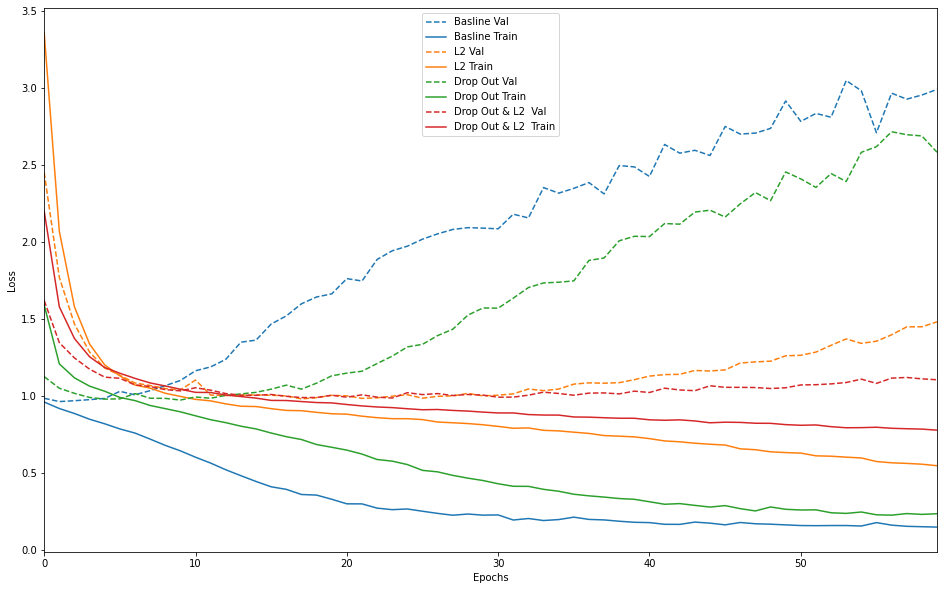

In [ ]:
plot_history(
    [('basline',baseline_history),
    ('L2',l2_history),
    ('drop out' , drop_out_history),
    ('drop out & L2 ',drop_out_L2_history)])

# 4. Visualization: Loss / Accuracy / F1 score

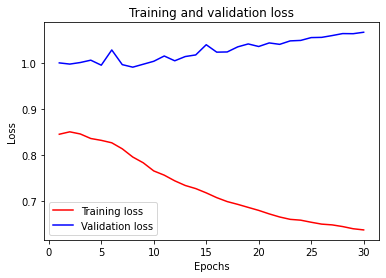

In [ ]:
# Visualize Training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()      

plt.show()

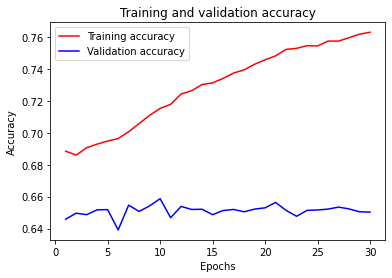

In [ ]:
# Visualize Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

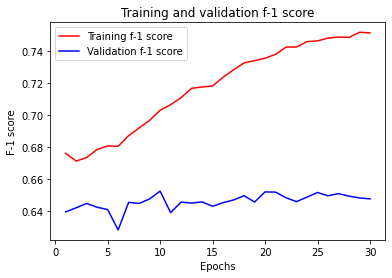

In [ ]:
# Visualize F-1 score
f1 = history.history['f1score']
val_f1 = history.history['val_f1score']

plt.plot(epochs, f1, 'r', label = 'Training f-1 score')
plt.plot(epochs, val_f1, 'b', label = 'Validation f-1 score')
plt.title('Training and validation f-1 score')
plt.xlabel('Epochs')
plt.ylabel('F-1 score')
plt.legend()

plt.show()

In [ ]:
# 모델 저장
model.save('my_model.h5')

In [ ]:
#Load saved model, and predict 
from tensorflow.keras.models import load_model
new_model = load_model('my_model.h5')

new_model.predict(X_test, y_test)

ValueError: ignored

In [ ]:
#Call Back 으로 저장
from tensorflow.keras.callbacks import ModelCheckpoint
import os

checkpoint_path = "/content/drive/My Drive/semi3/HSK/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path, verbose=1, 
                              save_weights_only=True, period=1)

# 체크포인트 콜백 만들기
cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
model = create_model()

model.fit(x, y,  epochs = 2, validation_split = 0.3, callbacks = [cp_callback])

In [ ]:
# Evaluate Model
_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test, batch_size=batch_size)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

In [ ]:
## Early stopping

#monitor: early stopping을 결정하는 기준
#min_delta: 이거보다 변화가 작으면 멈춘다.
#atience: 이 숫자의 epoch만큼 변하지 개선(감소)되지 않으면 멈춘다. (2로 설정시, 2연속 val_loss가 증가하면 train 중지)

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2)

model = create_model()
history = model.fit(x, y,  epochs = 20, validation_split = 1/6, callbacks = [es], batch_size= 512)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20,5))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.xlim(7,13)
plt.ylim(0.3,0.4)

plt.show()